# Data Prep

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import time

In [ ]:
#27b1609118c141ef96a77efc388122f0
#d2cda0855fa147aebd5c5f9a187c903f

In [ ]:
client_id = getpass.getpass(prompt='Enter Spotify app client id: ')

Enter Spotify app client id: ··········


In [ ]:
client_secret = getpass.getpass(prompt='Enter Spotify app client secret: ')

Enter Spotify app client secret: ··········


In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,
                                                      client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "/content/drive/MyDrive/Eskwelabs/Sprint 3"
os.chdir(home_dir)

In [ ]:
hale_audio_features = pd.read_csv('/content/drive/MyDrive/Eskwelabs/Sprint 3/Hale_songs_tracks_audio_features.csv')

# Define Helper Functions

In [ ]:
# Helper function to print structure of a nested dict object with lists
def print_dict_structure(d, indent=0, upper_level_keys=0):
    for key, value in d.items():
        if isinstance(value, list):
            print("  " * indent + str(key) + ": List")
            if len(value) > 0:
                if isinstance(value[0], dict):
                    print_dict_structure(value[0], indent + 1)
                else:
                    print("  " * (indent+1) + "List Item")
        elif isinstance(value, dict):
            print("  " * indent + str(key) + ": Dict")
            print_dict_structure(value, indent + 1)
        else:
            print("  " * indent + str(key) + ": " + str(type(value).__name__))


In [ ]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist

def get_track_data(track_id):
    # Get track data
    track_data = sp.track(track_id)
    # Populate dict
    relevant_track_data = {'track_id':track_id}
    relevant_track_data['track_name'] = track_data['name']
    relevant_track_data['artist_id'] = track_data['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data['artists'][0]['name']
    relevant_track_data['album_id'] = track_data['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data['duration_ms']
    relevant_track_data['release_date'] = track_data['album']['release_date']
    relevant_track_data['popularity'] = track_data['popularity']

    # Get track audio features
    track_audio_features_data = sp.audio_features(track_id)[0] # get first element
    audio_features_keys = list(track_audio_features_data.keys())[:11]
    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

In [ ]:
# Helper function to plot time series noting location of outliers
def plot_ts_data(data, lower_bound, upper_bound, mark_outliers=True):
    fig = plt.subplots(figsize=(13,4))
    plt.plot(data)
    plt.fill_between(data.index, lower_bound, upper_bound, color='k',alpha=0.15)

    if mark_outliers:
        data_above_ub = data[data['streams']>upper_bound]
        data_below_lb = data[data['streams']<lower_bound]
        plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
        plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

    plt.legend()
    plt.ylabel('streams')

In [ ]:
def adf_test(data):
    adf_test = adfuller(data)
    adf_result = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','N Lags Used',\
                                                'N Observations Used'])
    for key,value in adf_test[4].items():
            adf_result['Critical Value (%s)'%key] = value

    return adf_result

# JK

In [ ]:
artist_id = '0a4r2EnsevvHCukoJ1xFwJ'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0a4r2EnsevvHCukoJ1xFwJ'},
 'followers': {'href': None, 'total': 1403758},
 'genres': ['opm'],
 'href': 'https://api.spotify.com/v1/artists/0a4r2EnsevvHCukoJ1xFwJ',
 'id': '0a4r2EnsevvHCukoJ1xFwJ',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb742c6debaddcf5e94cced1d1',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174742c6debaddcf5e94cced1d1',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178742c6debaddcf5e94cced1d1',
   'width': 160}],
 'name': 'juan karlos',
 'popularity': 69,
 'type': 'artist',
 'uri': 'spotify:artist:0a4r2EnsevvHCukoJ1xFwJ'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

ERE
Buwan
Demonyo
Gabi
Shot Puno
Tapusin Na Natin To (feat. Paolo Benjamin of Ben&Ben)
may halaga pa ba ako sayo??
Demonyo (Redefined)
Sad Songs and Bullshit
Boston


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: Sad Songs and Bullshit Part 1, Album ID: 7H0mDAUmK6BUuGZCy10kcv
Album Name: Diwa, Album ID: 3WiSoqTB6kQc8Sunmdtcug
Album Name: JKL, Album ID: 67vvDiZLNyjNQ1gU6El7GC


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id                                         track_name  \
0   0Wbz830pfbFJOURtzRJrs0                             Sad Songs and Bullshit   
1   2BLdelIp46CHvKkyWeqZHL                                                ERE   
2   1Wgrmn9afIi8NCHBIMIk5e                        may halaga pa ba ako sayo??   
3   6AJbNcdXNEsVoMqzikQc90                                             Manhid   
4   3FQuH8WQRC5ZJvJLWDZEpa                                           Paruparo   
5   6bRB6pvgrVRAi1VdFz9TJb                                               Gabi   
6   6MJZdfRsIqQU0LYpV2LrzZ                                       Time Machine   
7   5xc0pk2ddmf1ygHCvhdE9d                                            Lumisan   
8   3xsG0nlcW9rnkj8LbL7YEU  Tapusin Na Natin To (feat. Paolo Benjamin of B...   
9   4lc3mY2nd1bVzBOKe8uMBw                                               Ulan   
10  6EYcB9BS4impPFgmFxMy7P                                          Kalawakan   
11  1pe3LbZXSvEe5cyvE4t5Wo                                              Malay   
12  1LLEuTmZ9uzJQqcbeHA4yd                                           Pasensya   
13  6bYbqNumzBoQhS1kHuj30K                                         Sampaguita   
14  37GrO7S96eCqHTZ6T5QfQV                                           Kulimlim   
15  5l89pZ0XzUTwjs5Fl5c6xi                                            Sistema   
16  4NWRSsHxiv3tOWeQqkmsXW                                              Biyak   
17  1VtKLC5oZ6aacOq76eCK4u                                           Miss You   
18  2u3vcSJ8ianMupkiqrcpJ7                                              Jenny   
19  1IfPJPQvgB6WrEQpUB5Kdn                               Sana Kung Pwede Lang   
20  1WXs4O7mBxXglHJPwYweHq                                            Demonyo   
21  6n8l7JOAJ5qC2jNPWAqA18                                            Move On   
22  0F18RvltuDDZzC31tsYPVW                                          Here I Am   
23  2g9v7F8NGIiaEq5fqFhoBd                                            Forever   
24  0F7KF7sAkjGHu03j4EVzmf                                      Wala Nang Iba   
25  6lkqLVdnvxjpUaw8nZ2uSS                                           Too Much   
26  1MKbLSZ5nEkh6cEFagG50r                          Move On - Electric JK Jam   
28  5f9808hpiCpuNyqqdXmpF2                                              Buwan   
31  3uWHNTmc2FFYmxlULgJ03E                                          Shot Puno   
34  1EyDyYmB9lrAaiLS1WcA4c                                Demonyo (Redefined)   
36  2axSXMLQxRlru2cyP7yqD8                                             Boston   

                 artist_id  artist_name                album_id  duration  \
0   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    227307   
1   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    284812   
2   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    408795   
3   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    224129   
4   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    128130   
5   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    317975   
6   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    300140   
7   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    211026   
8   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    183250   
9   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    270855   
10  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    275500   
11  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    309000   
12  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    270250   
13  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    295000   
14  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    357000   
15  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    406629   
16  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    354172   
17  0a4r2EnsevvHCukoJ1xFwJ  juan karlos

In [ ]:
csv_filename = 'JK_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                                         track_name  \
16  4NWRSsHxiv3tOWeQqkmsXW                                              Biyak   
36  2axSXMLQxRlru2cyP7yqD8                                             Boston   
28  5f9808hpiCpuNyqqdXmpF2                                              Buwan   
20  1WXs4O7mBxXglHJPwYweHq                                            Demonyo   
34  1EyDyYmB9lrAaiLS1WcA4c                                Demonyo (Redefined)   
1   2BLdelIp46CHvKkyWeqZHL                                                ERE   
23  2g9v7F8NGIiaEq5fqFhoBd                                            Forever   
5   6bRB6pvgrVRAi1VdFz9TJb                                               Gabi   
22  0F18RvltuDDZzC31tsYPVW                                          Here I Am   
18  2u3vcSJ8ianMupkiqrcpJ7                                              Jenny   
10  6EYcB9BS4impPFgmFxMy7P                                          Kalawakan   
14  37GrO7S96eCqHTZ6T5QfQV                                           Kulimlim   
7   5xc0pk2ddmf1ygHCvhdE9d                                            Lumisan   
11  1pe3LbZXSvEe5cyvE4t5Wo                                              Malay   
3   6AJbNcdXNEsVoMqzikQc90                                             Manhid   
17  1VtKLC5oZ6aacOq76eCK4u                                           Miss You   
21  6n8l7JOAJ5qC2jNPWAqA18                                            Move On   
26  1MKbLSZ5nEkh6cEFagG50r                          Move On - Electric JK Jam   
4   3FQuH8WQRC5ZJvJLWDZEpa                                           Paruparo   
12  1LLEuTmZ9uzJQqcbeHA4yd                                           Pasensya   
0   0Wbz830pfbFJOURtzRJrs0                             Sad Songs and Bullshit   
13  6bYbqNumzBoQhS1kHuj30K                                         Sampaguita   
19  1IfPJPQvgB6WrEQpUB5Kdn                               Sana Kung Pwede Lang   
31  3uWHNTmc2FFYmxlULgJ03E                                          Shot Puno   
15  5l89pZ0XzUTwjs5Fl5c6xi                                            Sistema   
8   3xsG0nlcW9rnkj8LbL7YEU  Tapusin Na Natin To (feat. Paolo Benjamin of B...   
6   6MJZdfRsIqQU0LYpV2LrzZ                                       Time Machine   
25  6lkqLVdnvxjpUaw8nZ2uSS                                           Too Much   
9   4lc3mY2nd1bVzBOKe8uMBw                                               Ulan   
24  0F7KF7sAkjGHu03j4EVzmf                                      Wala Nang Iba   
2   1Wgrmn9afIi8NCHBIMIk5e                        may halaga pa ba ako sayo??   

                 artist_id  artist_name                album_id  duration  \
16  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    354172   
36  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  184ZzbrJlpXIA5lsEjJ4il    215074   
28  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  2CF1utwLM2yXHMZhwFGVY1    343446   
20  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  67vvDiZLNyjNQ1gU6El7GC    218000   
34  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7sprCBdpxhkhpntzwa2Dwq    273708   
1   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    284812   
23  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  67vvDiZLNyjNQ1gU6El7GC    303445   
5   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    317975   
22  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  67vvDiZLNyjNQ1gU6El7GC    227716   
18  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    329159   
10  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    275500   
14  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    357000   
7   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    211026   
11  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    309000   
3   0a4r2EnsevvHCukoJ1xFwJ  juan karlos  7H0mDAUmK6BUuGZCy10kcv    224129   
17  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  3WiSoqTB6kQc8Sunmdtcug    398300   
21  0a4r2EnsevvHCukoJ1xFwJ  juan karlos  67vvDiZLNyjNQ1gU6El7GC    265617   
26  0a4r2EnsevvHCukoJ1xFwJ  juan karlos

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  121.866290
1                key    4.580645
2               mode    0.838710
3       danceability    0.555613
4       acousticness    0.490652
5             energy    0.457197
6            valence    0.359484
7           liveness    0.162177
8        speechiness    0.047177
9   instrumentalness    0.009832
10          loudness   -9.418548

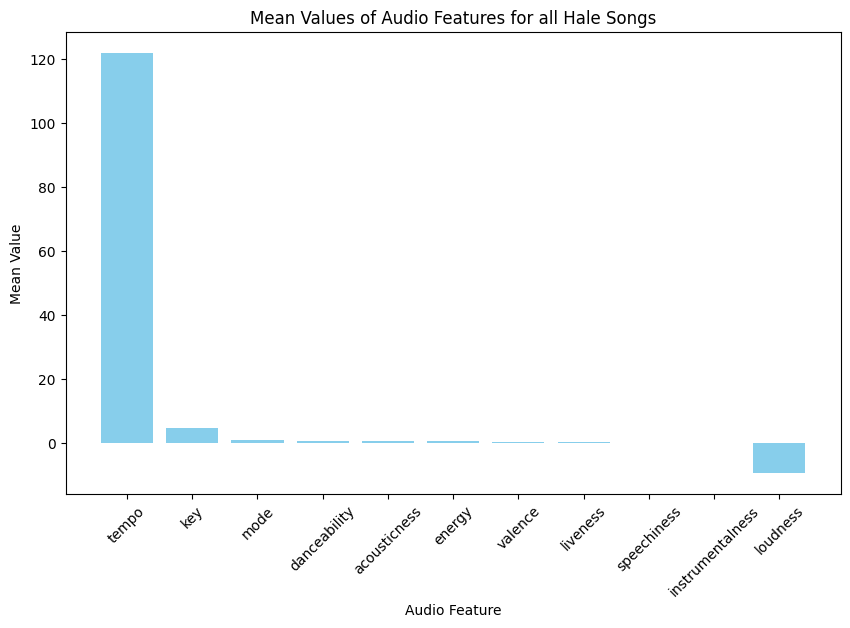

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id track_name               artist_id  artist_name  \
28  5f9808hpiCpuNyqqdXmpF2      Buwan  0a4r2EnsevvHCukoJ1xFwJ  juan karlos   
20  1WXs4O7mBxXglHJPwYweHq    Demonyo  0a4r2EnsevvHCukoJ1xFwJ  juan karlos   
1   2BLdelIp46CHvKkyWeqZHL        ERE  0a4r2EnsevvHCukoJ1xFwJ  juan karlos   
31  3uWHNTmc2FFYmxlULgJ03E  Shot Puno  0a4r2EnsevvHCukoJ1xFwJ  juan karlos   

                  album_id  duration release_date  popularity  danceability  \
28  2CF1utwLM2yXHMZhwFGVY1    343446   2018-06-22          71         0.631   
20  67vvDiZLNyjNQ1gU6El7GC    218000   2017-01-27          70         0.415   
1   7H0mDAUmK6BUuGZCy10kcv    284812   2023-09-22          76         0.480   
31  3TnSVVzQ4WsJfdt8bsuqpd    273500   2022-10-14          67         0.544   

    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
28   0.381    7   -11.808     1       0.0400        0.4470          0.000171   
20   0.508    0    -9.169     1       0.0363        0.0509          0.016200   
1    0.571    7    -7.818     1       0.0420        0.5260          0.000213   
31   0.479    7    -6.664     1       0.0963        0.6720          0.000000   

    liveness  valence    tempo                     album_name  
28    0.0902    0.360  126.008                        Singles  
20    0.1030    0.114  188.744                            JKL  
1     0.2320    0.257  146.051  Sad Songs and Bullshit Part 1  
31    0.6540    0.471  139.575                        Singles

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


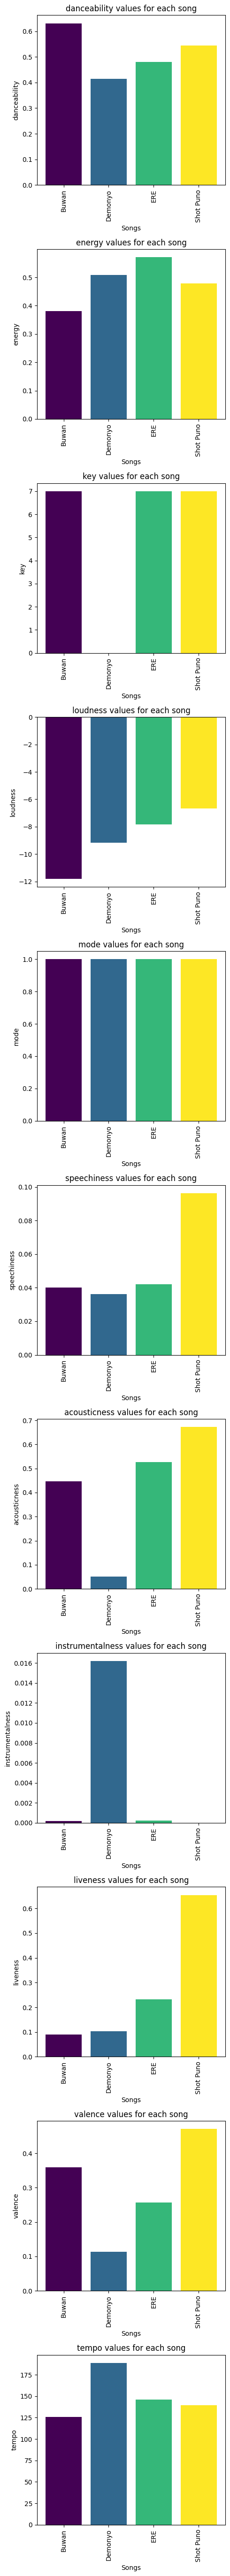

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Gloc 9

In [ ]:
artist_id = '7HJDRQAfEcFiARVehhM6qD'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7HJDRQAfEcFiARVehhM6qD'},
 'followers': {'href': None, 'total': 1361451},
 'genres': ['opm', 'pinoy hip hop', 'pinoy trap'],
 'href': 'https://api.spotify.com/v1/artists/7HJDRQAfEcFiARVehhM6qD',
 'id': '7HJDRQAfEcFiARVehhM6qD',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebc427c3663058a0a1e7945d53',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174c427c3663058a0a1e7945d53',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178c427c3663058a0a1e7945d53',
   'width': 160}],
 'name': 'Gloc-9',
 'popularity': 60,
 'type': 'artist',
 'uri': 'spotify:artist:7HJDRQAfEcFiARVehhM6qD'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

Upuan (feat. Jeazell Grutas)
Simpleng Tao
Bagsakan
Halik
Sirena
Love Story Ko
Hinahanap Ng Puso (feat. Hannah Romawac)
Bahay Yugyugan
Magda
Norem


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: Pilak, Album ID: 1Bpxaw9iEYEvKWAzUnJQwF
Album Name: Sukli, Album ID: 2ufxviLKc2C0TvCuw2bfIS
Album Name: Biyahe Ng Pangarap (Live), Album ID: 17h6zHYykWmkMR6Y3I167G
Album Name: Liham At Lihim, Album ID: 3TPhLYysQHotzvwc94cq2r
Album Name: MKNM (Mga Kwento Ng Makata), Album ID: 1xOZQ0D7JhmQuklgl1XrtG
Album Name: Talumpati, Album ID: 2uMqaPd7NjA5XefABPNVuZ
Album Name: Matrikula, Album ID: 4OW7MmELeEHi36FWX02IAk
Album Name: Diploma, Album ID: 50Da52WhXNCApJvMPG7YNg
Album Name: Ako Si, Album ID: 30jAKGaclfAFfp9JPLKjNF
Album Name: G9 (Gloc Nine), Album ID: 0ywziMzhZW2ee99KGelaNv


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id      track_name               artist_id  \
0    4BtBGr5lm4CtiIVFGEI8Fu           Pilak  7HJDRQAfEcFiARVehhM6qD   
1    5Q7UvY8IEicx1unql1smm5           Buhat  7HJDRQAfEcFiARVehhM6qD   
2    6m5SZunxILQQsndmmNYVhf   Kamusta Ka Na  7HJDRQAfEcFiARVehhM6qD   
3    0xlTnx065c58AcFW5Ntkqd  Bahay Yugyugan  7HJDRQAfEcFiARVehhM6qD   
4    765oGHywvMXMw5aMX98NfR      Di Umiinom  7HJDRQAfEcFiARVehhM6qD   
..                      ...             ...                     ...   
131  5ZomIq5rXA7xasLWsBFZeV          Ako Si  7HJDRQAfEcFiARVehhM6qD   
134  5v3gtW2EjxOuCe3akCiBlD        Bagsakan  2XHTklRsNMOOQT56Zm3WS4   
135  340mIDGqsUc0HqBa8CuYKi           Halik  7HJDRQAfEcFiARVehhM6qD   
139  4ofc8m6q1sLwkPBInLZvOt  Bahay Yugyugan  7HJDRQAfEcFiARVehhM6qD   
141  1ECl4vFF1IiBcXIF5rNy8X           Norem  7HJDRQAfEcFiARVehhM6qD   

          artist_name                album_id  duration release_date  \
0              Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    235688   2023-10-27   
1              Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    212448   2023-10-27   
2              Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    259762   2023-10-27   
3              Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    255081   2023-10-27   
4              Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    230721   2023-10-27   
..                ...                     ...       ...          ...   
131            Gloc-9  0ywziMzhZW2ee99KGelaNv    192626   2003-09-01   
134  Parokya Ni Edgar  7g5RBMWC3jvPVmytLEZLZL    207933   2005-08-10   
135            Gloc-9  4ld3EBQayiMTU4Po6cjODi    242718   2020-01-17   
139            Gloc-9  01dbx99oyLRARcTi3wceVL    255081   2022-11-25   
141            Gloc-9  6jr9lat4upLvXY3sGhNfrH    280333   2017-10-09   

     popularity  danceability  energy  key  loudness  mode  speechiness  \
0             0         0.435   0.944    5    -4.925     0       0.3500   
1             0         0.719   0.711   10    -6.396     0       0.0342   
2             0         0.715   0.743    0    -5.689     0       0.0967   
3             0         0.726   0.811    7    -5.199     1       0.0646   
4             0         0.698   0.739    5    -6.119     0       0.0462   
..          ...           ...     ...  ...       ...   ...          ...   
131          21         0.866   0.884    0    -6.336     1       0.0681   
134          64         0.780   0.945    7    -5.731     0       0.1010   
135          60         0.658   0.812   10    -7.507     1       0.0570   
139          56         0.726   0.811    7    -5.199     1       0.0646   
141          52         0.694   0.822    9    -5.863     0       0.0387   

     acousticness  instrumentalness  liveness  valence    tempo  \
0          0.1120          0.000366     0.374    0.744   83.083   
1          0.1500          0.511000     0.137    0.516   98.006   
2          0.4780          0.000000     0.161    0.677   83.945   
3          0.0572          0.020600     0.321    0.961   91.516   
4          0.5270          0.000002     0.118    0.768   97.015   
..            ...               ...       ...      ...      ...   
131        0.2620          0.000000     0.107    0.964   95.976   
134        0.2270          0.000012     0.327    0.662  135.037   
135        0.3350          0.000000     0.334    0.942   79.995   
139        0.0572          0.020600     0.321    0.961   91.516   
141        0.0520          0.000000     0.210    0.459  148.036   

         album_name  
0             Pilak  
1             Pilak  
2             Pilak  
3             Pilak  
4             Pilak  
..              ...  
131  G9 (Gloc Nine)  
134         Singles  
135         Singles  
139         Singles  
141         Singles  

[136 rows x 20 columns]

In [ ]:
csv_filename = 'gloc9_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                                        track_name  \
63   3Rbh5VJFeSfZqx590SNDxl  Akin Lang Naman (feat. G-Dawg & Gordon Lambatan)   
131  5ZomIq5rXA7xasLWsBFZeV                                            Ako Si   
48   33rRIlt2quHU3yyyhXZCmc                                    Alalay Ng Hari   
30   0gtALg4Dv4Ky8sq0ym3ocD                             Alalay Ng Hari (Live)   
17   5gGlJBxEBdZfcGhLqGk4ur                                   Ang Probinsyano   
..                      ...                                               ...   
82   5sSG2CQBI3perj0gMbhXd1                      Upuan (feat. Jeazell Grutas)   
116  5S840AaVQRu57Pvx8XvBc0                                         Usap Tayo   
118  1CiHLZnatca8IGThSFiOYQ                          Usap Tayo - Extended Mix   
64   21FPqoc0NyXVB3wiB3iFRg              Walang Natira (feat. Sheng Belmonte)   
9    7KiM2LUbjnFA5M96uRlTJP                               Walang Pumapalakpak   

                  artist_id artist_name                album_id  duration  \
63   7HJDRQAfEcFiARVehhM6qD      Gloc-9  2uMqaPd7NjA5XefABPNVuZ    156560   
131  7HJDRQAfEcFiARVehhM6qD      Gloc-9  0ywziMzhZW2ee99KGelaNv    192626   
48   7HJDRQAfEcFiARVehhM6qD      Gloc-9  1xOZQ0D7JhmQuklgl1XrtG    247813   
30   7HJDRQAfEcFiARVehhM6qD      Gloc-9  17h6zHYykWmkMR6Y3I167G    242253   
17   7HJDRQAfEcFiARVehhM6qD      Gloc-9  2ufxviLKc2C0TvCuw2bfIS    183106   
..                      ...         ...                     ...       ...   
82   7HJDRQAfEcFiARVehhM6qD      Gloc-9  4OW7MmELeEHi36FWX02IAk    253000   
116  7HJDRQAfEcFiARVehhM6qD      Gloc-9  30jAKGaclfAFfp9JPLKjNF    194537   
118  7HJDRQAfEcFiARVehhM6qD      Gloc-9  30jAKGaclfAFfp9JPLKjNF    547452   
64   7HJDRQAfEcFiARVehhM6qD      Gloc-9  2uMqaPd7NjA5XefABPNVuZ    240040   
9    7HJDRQAfEcFiARVehhM6qD      Gloc-9  1Bpxaw9iEYEvKWAzUnJQwF    268000   

    release_date  popularity  danceability  energy  key  loudness  mode  \
63    2011-01-18          21         0.792   0.882   10    -2.867     0   
131   2003-09-01          21         0.866   0.884    0    -6.336     1   
48    2012-01-01          45         0.651   0.818    7    -6.673     0   
30    2014-11-10          37         0.499   0.816    7    -6.613     0   
17    2016-01-01          21         0.686   0.811    9    -6.332     1   
..           ...         ...           ...     ...  ...       ...   ...   
82    2009-06-26          65         0.777   0.722    1    -6.574     0   
116   2005-08-16          12         0.671   0.623    1    -8.562     1   
118   2005-08-16          20         0.874   0.579   11    -8.358     1   
64    2011-01-18          49         0.762   0.810    7    -3.711     1   
9     2023-10-27           0         0.689   0.863    6    -4.930     0   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
63        0.0608         0.169          0.000000    0.2020    0.763  105.010   
131       0.0681         0.262          0.000000    0.1070    0.964   95.976   
48        0.2670         0.586          0.000000    0.2710    0.728  170.031   
30        0.0679         0.311          0.000169    0.8770    0.497  172.161   
17        0.0652         0.313          0.000000    0.1150    0.667   96.942   
..           ...           ...               ...       ...      ...      ...   
82        0.0306         0.245          0.014700    0.3640    0.826   95.013   
116       0.0355         0.160          0.000508    0.1020    0.626   86.010   
118       0.2720         0.322          0.000000    0.1110    0.778   86.034   
64        0.0691         0.267          0.000013    0.0658    0.718   95.984   
9         0.0743         0.198          0.000000    0.0646    0.743   89.971   

                      album_name  
63                     Talumpati  
131               G9 (Gloc Nine)  
48   MKNM (Mga Kwento Ng Makata)  
30     Biyahe Ng Pangarap (Live)  
17                         Sukli  
..                           ...  
82            

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  116.463779
1                key    5.816176
2             energy    0.746213
3            valence    0.665104
4       danceability    0.662199
5               mode    0.389706
6       acousticness    0.325458
7           liveness    0.256415
8        speechiness    0.125759
9   instrumentalness    0.040405
10          loudness   -7.998125

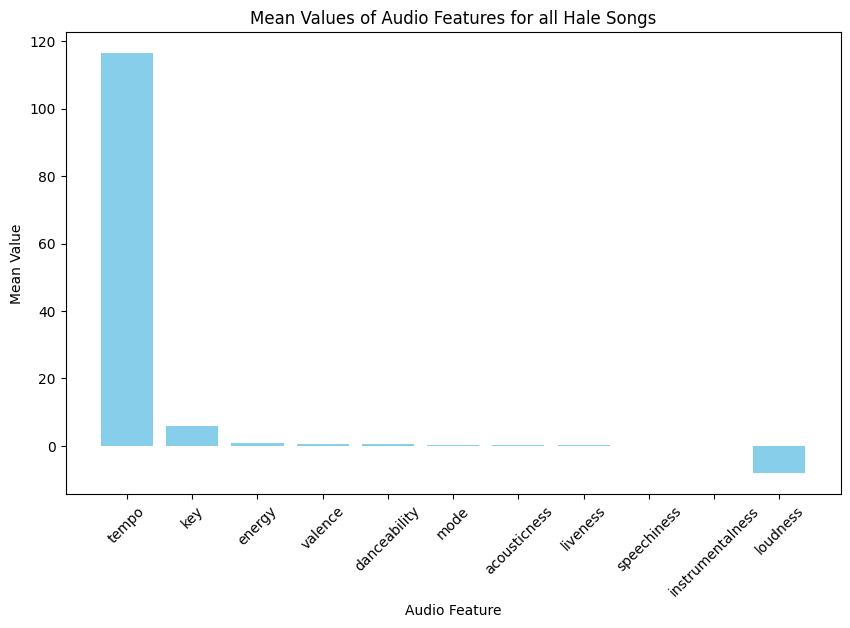

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id                                track_name  \
134  5v3gtW2EjxOuCe3akCiBlD                                  Bagsakan   
139  4ofc8m6q1sLwkPBInLZvOt                            Bahay Yugyugan   
135  340mIDGqsUc0HqBa8CuYKi                                     Halik   
25   6ONufuMljjPskPOMF1gGIw                      Hari Ng Tondo (Live)   
126  1r50q0lRt8LhVOrwm8JjRg  Hinahanap Ng Puso (feat. Hannah Romawac)   
109  3BqDp6yewmSm2FcmC0jpXa     Ipagpatawad Mo (feat. Dzing Macanaya)   
93   2aBUWilZt3uX4wfgHg4g6S                  Lando (feat. Francis M.)   
110  7f3S33lB0WEQCSMGNs0GC4                             Love Story Ko   
36   3rmvXHlqIGiQndabkh5hxY                                     Magda   
141  1ECl4vFF1IiBcXIF5rNy8X                                     Norem   
124  7K6g55fp09yQLBhgni3xqV                              Simpleng Tao   
49   1y8uWtPF64SEAkU2RWvYpr                                    Sirena   
82   5sSG2CQBI3perj0gMbhXd1              Upuan (feat. Jeazell Grutas)   
64   21FPqoc0NyXVB3wiB3iFRg      Walang Natira (feat. Sheng Belmonte)   

                  artist_id       artist_name                album_id  \
134  2XHTklRsNMOOQT56Zm3WS4  Parokya Ni Edgar  7g5RBMWC3jvPVmytLEZLZL   
139  7HJDRQAfEcFiARVehhM6qD            Gloc-9  01dbx99oyLRARcTi3wceVL   
135  7HJDRQAfEcFiARVehhM6qD            Gloc-9  4ld3EBQayiMTU4Po6cjODi   
25   7HJDRQAfEcFiARVehhM6qD            Gloc-9  17h6zHYykWmkMR6Y3I167G   
126  7HJDRQAfEcFiARVehhM6qD            Gloc-9  0ywziMzhZW2ee99KGelaNv   
109  7HJDRQAfEcFiARVehhM6qD            Gloc-9  30jAKGaclfAFfp9JPLKjNF   
93   7HJDRQAfEcFiARVehhM6qD            Gloc-9  50Da52WhXNCApJvMPG7YNg   
110  7HJDRQAfEcFiARVehhM6qD            Gloc-9  30jAKGaclfAFfp9JPLKjNF   
36   7HJDRQAfEcFiARVehhM6qD            Gloc-9  3TPhLYysQHotzvwc94cq2r   
141  7HJDRQAfEcFiARVehhM6qD            Gloc-9  6jr9lat4upLvXY3sGhNfrH   
124  7HJDRQAfEcFiARVehhM6qD            Gloc-9  0ywziMzhZW2ee99KGelaNv   
49   7HJDRQAfEcFiARVehhM6qD            Gloc-9  1xOZQ0D7JhmQuklgl1XrtG   
82   7HJDRQAfEcFiARVehhM6qD            Gloc-9  4OW7MmELeEHi36FWX02IAk   
64   7HJDRQAfEcFiARVehhM6qD            Gloc-9  2uMqaPd7NjA5XefABPNVuZ   

     duration release_date  popularity  danceability  energy  key  loudness  \
134    207933   2005-08-10          64         0.780   0.945    7    -5.731   
139    255081   2022-11-25          56         0.726   0.811    7    -5.199   
135    242718   2020-01-17          60         0.658   0.812   10    -7.507   
25     260906   2014-11-10          50         0.494   0.879    4    -5.286   
126    262560   2003-09-01          56         0.707   0.553    7    -6.983   
109    310835   2005-08-16          51         0.758   0.623    6    -7.730   
93     311320   2007-03-16          49         0.568   0.631    9   -11.142   
110    227321   2005-08-16          56         0.756   0.728    9    -7.538   
36     320786   2013-01-01          53         0.738   0.808    6    -8.305   
141    280333   2017-10-09          52         0.694   0.822    9    -5.863   
124    244600   2003-09-01          65         0.753   0.685    1    -5.994   
49     278480   2012-01-01          59         0.661   0.954   11    -6.604   
82     253000   2009-06-26          65         0.777   0.722    1    -6.574   
64     240040   2011-01-18          49         0.762   0.810    7    -3.711   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
134     0       0.1010        0.2270          0.000012    0.3270    0.662   
139     1       0.0646        0.0572          0.020600    0.3210    0.961   
135     1       0.0570        0.3350          0.000000    0.3340    0.942   
25      0       0.1860        0.5500          0.000752    0.5410    0.401   
126     1       0.0294        0.0162          0.001960    0.1910    0.528   
109     0       0.0540        0.5260          0.004820    0.1050    0.337   
93      0       0.0442        0.2720          0.000000    0.3890    0.652   
110     1       0.0457   

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


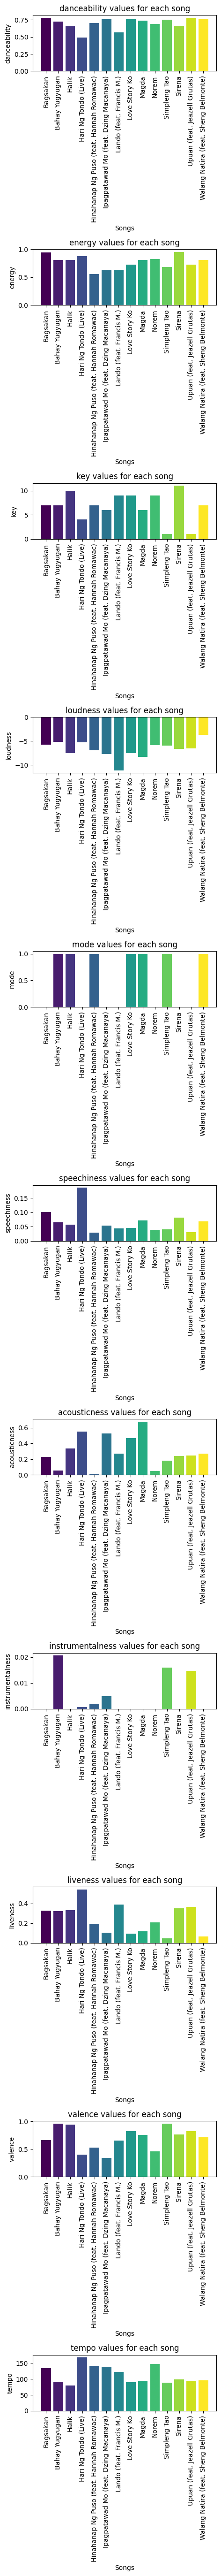

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# csv_filename = 'track_data.csv'

# # Use the to_csv method to save the DataFrame to the CSV file in the current working directory
# track_data.to_csv(csv_filename, index=False)

# Liezel

In [ ]:
artist_id = '3sfqAkmtEsyMFqa9Q4KLI0'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3sfqAkmtEsyMFqa9Q4KLI0'},
 'followers': {'href': None, 'total': 148161},
 'genres': ['opm'],
 'href': 'https://api.spotify.com/v1/artists/3sfqAkmtEsyMFqa9Q4KLI0',
 'id': '3sfqAkmtEsyMFqa9Q4KLI0',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb246fb134c1e203aab2b83cd8',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174246fb134c1e203aab2b83cd8',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178246fb134c1e203aab2b83cd8',
   'width': 160}],
 'name': 'Liezel Garcia',
 'popularity': 37,
 'type': 'artist',
 'uri': 'spotify:artist:3sfqAkmtEsyMFqa9Q4KLI0'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

Gisingin Ang Puso - Theme From "Pure Love"
Anima Christi
Alipin Ako
Give Love On Christmas Day
Ngayong Alam Ko Na - Theme From "Two Wives"
Huwag Ka Lang Mawawala - Theme From "Walang Hanggan"
Live Christ, Share Christ
Ikaw Lang At Ako
Wala Na Bang Pag-Ibig
Di Ko Kayang Limutin - Theme From "Kristine"


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: Liezel Garcia, Album ID: 30DhOEe86oo9LSsgZENNZ5


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id                                         track_name  \
0   7nWSkuuf14UvfI4ASQLygz        Ngayong Alam Ko Na - Theme From "Two Wives"   
1   6pL50xcqnc9vvAF3l36xJa         Gisingin Ang Puso - Theme From "Pure Love"   
2   77SPrWmYkhQt3EXPSUOKlZ        Bakit Pa - Theme From "Kung Ako'Y Iiwan Mo"   
3   3za4v7AZJWHBhi4BfhvCPH  Lumayo Ka Man Sa Akin - Theme From "Phr Presen...   
4   1HWL8JlnaMjfO8G67Ihyjz       Di Ko Kayang Limutin - Theme From "Kristine"   
5   21Vi2Opyh6jszp3tYU0cel  Huwag Ka Lang Mawawala - Theme From "Walang Ha...   
6   106LrABrRytmG9JgNvc1W4                              Wala Na Bang Pag-Ibig   
7   2U4SbcCmOyMcQ3Svcl50i1                                         Alipin Ako   
8   271D9nZ9VOnsCXXIKBMrA1                                       Nasaan Ka Na   
9   3FQNfpHC9XSPVXn4x1RQhH                                      Dance with Me   
10  1ZCb6btvWXkaCiO8izxaCZ                     Ngayong Alam Ko Na - Minus One   
11  2l6G3HFXTnrrWV4hQABGEz                      Gisingin Ang Puso - Minus One   
12  1zYk2uS5hkH3eEI9tui8So                               Bakit Pa - Minus One   
13  4FTE43XPBPuCbUV3xUn8Ja                  Lumayo Ka Man Sa Akin - Minus One   
14  2etIb20CNJdquqRUxQCd2D                   Di ko Kayang Limutin - Minus One   
15  2kIWJVfUcduQXBRVTYWBwi                 Huwag Ka Lang Mawawala - Minus One   
16  2wNx9kNHU3o12Uiv7sQDQr                  Wala Na Bang Pag-Ibig - Minus One   
17  4wdJJARVyzVvFuauFcqfCh                             Alipin Ako - Minus One   
19  2NKxgfLM5rKaTSq5zHBdE4                                      Anima Christi   
21  6cx5mtJSZ0Pyt3z5DyI3aQ                         Give Love On Christmas Day   
24  1ardLhEbtllTo2w4V03Vwn                          Live Christ, Share Christ   
25  0yZ9GGHoj1ak7A04YfRUsU                                   Ikaw Lang At Ako   

                 artist_id      artist_name                album_id  duration  \
0   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    235640   
1   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    247626   
2   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    272600   
3   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    318533   
4   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    261706   
5   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    252760   
6   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    246280   
7   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    277426   
8   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    273426   
9   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    240693   
10  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    235733   
11  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    247400   
12  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    272546   
13  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    318506   
14  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    261746   
15  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    252760   
16  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    245560   
17  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    276195   
19  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  63ZpSwJTOhvoFQA27MXQpd    161388   
21  0kRAKgEOVI43Qkz9PLmPt8     Bugoy Drilon  4KN9v84EEJnaVkT4jO6U80    204280   
24  7DW4ijH3n36QN0RlC0n649  Angeline Quinto  2arQyttD7PXIUakitj5QkQ    256208   
25  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  3RfIDxzGoVLFsKBsmiOdoV    301609   

   release_date  popularity  danceability  energy  key  loudness  mode  \
0    2012-07-31          35         0.549  0.5200    8    -6.149     1   
1    2012-07-31          52         0.464  0.4320    5    -7.582     1   
2    2012-07-31          18         0.621  0.3610    3    -5.916    

In [ ]:
csv_filename = 'liezel_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                                         track_name  \
7   2U4SbcCmOyMcQ3Svcl50i1                                         Alipin Ako   
17  4wdJJARVyzVvFuauFcqfCh                             Alipin Ako - Minus One   
19  2NKxgfLM5rKaTSq5zHBdE4                                      Anima Christi   
12  1zYk2uS5hkH3eEI9tui8So                               Bakit Pa - Minus One   
2   77SPrWmYkhQt3EXPSUOKlZ        Bakit Pa - Theme From "Kung Ako'Y Iiwan Mo"   
9   3FQNfpHC9XSPVXn4x1RQhH                                      Dance with Me   
4   1HWL8JlnaMjfO8G67Ihyjz       Di Ko Kayang Limutin - Theme From "Kristine"   
14  2etIb20CNJdquqRUxQCd2D                   Di ko Kayang Limutin - Minus One   
11  2l6G3HFXTnrrWV4hQABGEz                      Gisingin Ang Puso - Minus One   
1   6pL50xcqnc9vvAF3l36xJa         Gisingin Ang Puso - Theme From "Pure Love"   
21  6cx5mtJSZ0Pyt3z5DyI3aQ                         Give Love On Christmas Day   
15  2kIWJVfUcduQXBRVTYWBwi                 Huwag Ka Lang Mawawala - Minus One   
5   21Vi2Opyh6jszp3tYU0cel  Huwag Ka Lang Mawawala - Theme From "Walang Ha...   
25  0yZ9GGHoj1ak7A04YfRUsU                                   Ikaw Lang At Ako   
24  1ardLhEbtllTo2w4V03Vwn                          Live Christ, Share Christ   
13  4FTE43XPBPuCbUV3xUn8Ja                  Lumayo Ka Man Sa Akin - Minus One   
3   3za4v7AZJWHBhi4BfhvCPH  Lumayo Ka Man Sa Akin - Theme From "Phr Presen...   
8   271D9nZ9VOnsCXXIKBMrA1                                       Nasaan Ka Na   
10  1ZCb6btvWXkaCiO8izxaCZ                     Ngayong Alam Ko Na - Minus One   
0   7nWSkuuf14UvfI4ASQLygz        Ngayong Alam Ko Na - Theme From "Two Wives"   
6   106LrABrRytmG9JgNvc1W4                              Wala Na Bang Pag-Ibig   
16  2wNx9kNHU3o12Uiv7sQDQr                  Wala Na Bang Pag-Ibig - Minus One   

                 artist_id      artist_name                album_id  duration  \
7   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    277426   
17  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    276195   
19  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  63ZpSwJTOhvoFQA27MXQpd    161388   
12  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    272546   
2   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    272600   
9   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    240693   
4   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    261706   
14  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    261746   
11  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    247400   
1   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    247626   
21  0kRAKgEOVI43Qkz9PLmPt8     Bugoy Drilon  4KN9v84EEJnaVkT4jO6U80    204280   
15  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    252760   
5   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    252760   
25  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  3RfIDxzGoVLFsKBsmiOdoV    301609   
24  7DW4ijH3n36QN0RlC0n649  Angeline Quinto  2arQyttD7PXIUakitj5QkQ    256208   
13  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    318506   
3   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    318533   
8   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    273426   
10  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    235733   
0   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    235640   
6   3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    246280   
16  3sfqAkmtEsyMFqa9Q4KLI0    Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    245560   

   release_date  popularity  danceability  energy  key  loudness  mode  \
7    2012-07-31          44         0.524  0.4420    5    -6.026     1   
17   2012-07-31          10         0.527  0.4270    5    -9.883     1   
19         2010          49         0.226  0.3010    7    -6.731    

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  127.751136
1                key    5.045455
2               mode    0.772727
3       acousticness    0.496095
4       danceability    0.471636
5             energy    0.393859
6   instrumentalness    0.233052
7            valence    0.211105
8           liveness    0.148041
9        speechiness    0.031659
10          loudness   -8.997591

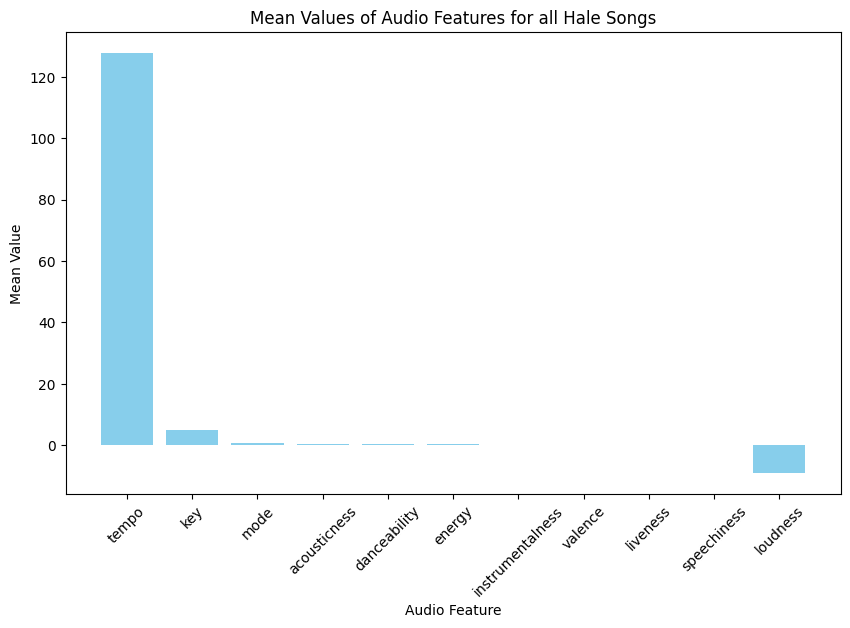

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id                                  track_name  \
7   2U4SbcCmOyMcQ3Svcl50i1                                  Alipin Ako   
19  2NKxgfLM5rKaTSq5zHBdE4                               Anima Christi   
1   6pL50xcqnc9vvAF3l36xJa  Gisingin Ang Puso - Theme From "Pure Love"   

                 artist_id    artist_name                album_id  duration  \
7   3sfqAkmtEsyMFqa9Q4KLI0  Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    277426   
19  3sfqAkmtEsyMFqa9Q4KLI0  Liezel Garcia  63ZpSwJTOhvoFQA27MXQpd    161388   
1   3sfqAkmtEsyMFqa9Q4KLI0  Liezel Garcia  30DhOEe86oo9LSsgZENNZ5    247626   

   release_date  popularity  danceability  energy  key  loudness  mode  \
7    2012-07-31          44         0.524   0.442    5    -6.026     1   
19         2010          49         0.226   0.301    7    -6.731     1   
1    2012-07-31          52         0.464   0.432    5    -7.582     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7        0.0282         0.437          0.000004     0.346    0.193  131.910   
19       0.0288         0.803          0.000000     0.116    0.299  144.143   
1        0.0300         0.612          0.000000     0.100    0.162  150.009   

       album_name  
7   Liezel Garcia  
19        Singles  
1   Liezel Garcia

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


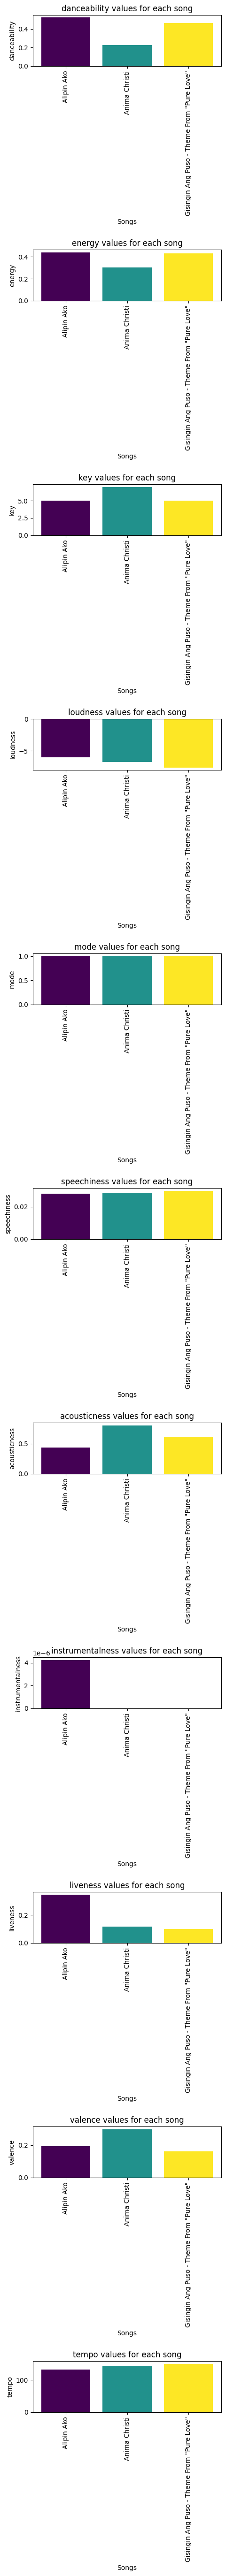

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Lauv

In [ ]:
artist_id = '5JZ7CnR6gTvEMKX4g70Amv'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JZ7CnR6gTvEMKX4g70Amv'},
 'followers': {'href': None, 'total': 6008471},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/5JZ7CnR6gTvEMKX4g70Amv',
 'id': '5JZ7CnR6gTvEMKX4g70Amv',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb9c0eb37411c26ff54c29dcb6',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051749c0eb37411c26ff54c29dcb6',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1789c0eb37411c26ff54c29dcb6',
   'width': 160}],
 'name': 'Lauv',
 'popularity': 76,
 'type': 'artist',
 'uri': 'spotify:artist:5JZ7CnR6gTvEMKX4g70Amv'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

I Like Me Better
Steal The Show - From "Elemental"
i'm so tired...
Love U Like That
Who
Paris in the Rain
All 4 Nothing (I'm So In Love)
Crush
Never Not
Mean It


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: All 4 Nothing, Album ID: 3edu0vIRVJ6vcK3yagi6oS
Album Name: ~how i'm feeling~, Album ID: 3ZuE680xhR1A4bCFGvL8mi
Album Name: ~how i'm feeling~ (the extras), Album ID: 1Y8FqfEHHJpEEYx3HPIa9m
Album Name: I met you when I was 18. (the playlist), Album ID: 71cQY3dUThCY6vVKaUIXqR
Album Name: I met you when I was 18. (the extras), Album ID: 53L0zJIjxxqClZyJGN5p7o


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id                         track_name  \
0   4CLDrNSJcJQIeFkHCLM3gb                                 26   
1   3aUD2nXnCYiGd9V1UhfyRz                           Stranger   
2   77MrX98hyOXLSs3dIfmOYk                Kids Are Born Stars   
3   7diY4bRXZ7ca6BEGNlz3xL                    Molly In Mexico   
4   7I5WT7DtpwSAhEeDLpZEfm     All 4 Nothing (I'm So In Love)   
..                     ...                                ...   
83  46Skl3iBSDTR3yL4b2hFCH  The Other - Matisse & Sadko Remix   
84  3UZXAJoG3diGe9KthoRNhW      Reforget - Milk N Cooks Remix   
86  6R5fYCySNHrqo4Og6O1ppn  Steal The Show - From "Elemental"   
88  3rmqiQbzPDx7A8p88IRFKg                   Love U Like That   
92  00Apys6jYrWA0Bse9Yon6O                              Crush   

                 artist_id   artist_name                album_id  duration  \
0   5JZ7CnR6gTvEMKX4g70Amv          Lauv  3edu0vIRVJ6vcK3yagi6oS    159607   
1   5JZ7CnR6gTvEMKX4g70Amv          Lauv  3edu0vIRVJ6vcK3yagi6oS    164688   
2   5JZ7CnR6gTvEMKX4g70Amv          Lauv  3edu0vIRVJ6vcK3yagi6oS    187026   
3   5JZ7CnR6gTvEMKX4g70Amv          Lauv  3edu0vIRVJ6vcK3yagi6oS    179388   
4   5JZ7CnR6gTvEMKX4g70Amv          Lauv  3edu0vIRVJ6vcK3yagi6oS    183014   
..                     ...           ...                     ...       ...   
83  5JZ7CnR6gTvEMKX4g70Amv          Lauv  53L0zJIjxxqClZyJGN5p7o    178333   
84  5JZ7CnR6gTvEMKX4g70Amv          Lauv  53L0zJIjxxqClZyJGN5p7o    232500   
86  5JZ7CnR6gTvEMKX4g70Amv          Lauv  1rMI4GKDwtz8Ok0e7jbE4l    191779   
88  5JZ7CnR6gTvEMKX4g70Amv          Lauv  4L1fTiCm419aQYUbfRJ3mA    211733   
92  26cMerAxjx9GedFt0lMDjm  Bella Poarch  4zhSWdHOuYGS7EoJiY6PaE    175636   

   release_date  popularity  danceability  energy  key  loudness  mode  \
0    2022-08-05          57         0.643   0.458    6    -8.636     1   
1    2022-08-05          64         0.650   0.538    5    -7.511     1   
2    2022-08-05          64         0.802   0.547    8    -7.034     1   
3    2022-08-05          53         0.664   0.855    1    -6.069     0   
4    2022-08-05          70         0.720   0.819    1    -4.588     1   
..          ...         ...           ...     ...  ...       ...   ...   
83   2018-05-31          30         0.433   0.590    4    -6.056     0   
84   2018-05-31          34         0.679   0.739    5    -5.304     0   
86   2023-06-02          79         0.620   0.640    7    -7.308     1   
88   2023-08-04          78         0.711   0.674   10    -3.559     1   
92   2023-09-15          73         0.632   0.832   11    -3.542     0   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0        0.0875       0.80900          0.000150    0.2370    0.506  164.160   
1        0.0464       0.12800          0.000005    0.1270    0.501  153.179   
2        0.0518       0.20500          0.000000    0.1090    0.922  109.966   
3        0.0633       0.00439          0.241000    0.0959    0.754  143.993   
4        0.0362       0.04110          0.000000    0.0606    0.898  131.990   
..          ...           ...               ...       ...      ...      ...   
83       0.0617       0.01730          0.000000    0.2520    0.289  179.774   
84       0.0440       0.08180          0.000040    0.0911    0.160   98.033   
86       0.0305       0.34100          0.001250    0.1400    0.409   92.522   
88       0.0317       0.09470          0.000000    0.0641    0.253   95.000   
92       0.0465       0.24700          0.000000    0.3490    0.289  110.025   

                               album_name  
0                           All 4 Nothing  
1                           All 4 Nothing  
2                           All 4 Nothing  
3                           All 4 Nothing  
4                           All 4 Nothing  
..                                    ...  
83  I met you when I was 18. (the extras)  
84  I met you when I was 18. (the extras)  
86                                Singles  
88                    

In [ ]:
csv_filename = 'lauv_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                               track_name  \
0   4CLDrNSJcJQIeFkHCLM3gb                                       26   
65  4ynpVFc18s3FxPEkJd5xZq                               Adrenaline   
4   7I5WT7DtpwSAhEeDLpZEfm           All 4 Nothing (I'm So In Love)   
10  6qfM0i5YwSXtKCeW0R3XWr                                 Bad Trip   
17  0Jw7m6p1qyz0VsvjpguMzu                                 Believed   
..                     ...                                      ...   
39  5LtGd9mQHiPm5cfRc8f4PP              fuck, i’m lonely - stripped   
26  7LpMG3AEaIJgs62HQhAa91                          i'm so tired...   
44  4Jq0Mr7rhlxggAw14BuBnk             i'm so tired... - MNEK remix   
43  4OQE489ScQdhBcELfacJw0  i'm so tired... - Stripped - Live in LA   
38  2vaJNNjys7rcbnIbkRNeVx                                   lonely   

                 artist_id artist_name                album_id  duration  \
0   5JZ7CnR6gTvEMKX4g70Amv        Lauv  3edu0vIRVJ6vcK3yagi6oS    159607   
65  5JZ7CnR6gTvEMKX4g70Amv        Lauv  71cQY3dUThCY6vVKaUIXqR    206368   
4   5JZ7CnR6gTvEMKX4g70Amv        Lauv  3edu0vIRVJ6vcK3yagi6oS    183014   
10  5JZ7CnR6gTvEMKX4g70Amv        Lauv  3edu0vIRVJ6vcK3yagi6oS    166700   
17  5JZ7CnR6gTvEMKX4g70Amv        Lauv  3ZuE680xhR1A4bCFGvL8mi    169760   
..                     ...         ...                     ...       ...   
39  5JZ7CnR6gTvEMKX4g70Amv        Lauv  1Y8FqfEHHJpEEYx3HPIa9m    187333   
26  5JZ7CnR6gTvEMKX4g70Amv        Lauv  3ZuE680xhR1A4bCFGvL8mi    162586   
44  5JZ7CnR6gTvEMKX4g70Amv        Lauv  1Y8FqfEHHJpEEYx3HPIa9m    200000   
43  5JZ7CnR6gTvEMKX4g70Amv        Lauv  1Y8FqfEHHJpEEYx3HPIa9m    187675   
38  5JZ7CnR6gTvEMKX4g70Amv        Lauv  1Y8FqfEHHJpEEYx3HPIa9m    198973   

   release_date  popularity  danceability  energy  key  loudness  mode  \
0    2022-08-05          57         0.643   0.458    6    -8.636     1   
65   2018-05-31          51         0.651   0.688    6    -4.407     1   
4    2022-08-05          70         0.720   0.819    1    -4.588     1   
10   2022-08-05          46         0.643   0.655    6    -5.606     1   
17   2020-03-06          48         0.796   0.518   11    -8.090     0   
..          ...         ...           ...     ...  ...       ...   ...   
39   2019-12-20          38         0.735   0.378    9    -6.842     1   
26   2020-03-06          78         0.548   0.735   11    -7.572     1   
44   2019-12-20          36         0.634   0.868    0    -9.200     1   
43   2019-12-20          51         0.491   0.196   11    -8.455     1   
38   2019-12-20          39         0.808   0.556    9    -6.452     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0        0.0875        0.8090          0.000150    0.2370    0.506  164.160   
65       0.1090        0.3540          0.000003    0.0741    0.616   95.017   
4        0.0362        0.0411          0.000000    0.0606    0.898  131.990   
10       0.0242        0.0558          0.000000    0.0731    0.382  130.110   
17       0.0516        0.0766          0.000000    0.4440    0.490  149.962   
..          ...           ...               ...       ...      ...      ...   
39       0.0488        0.2090          0.000000    0.0737    0.726   95.073   
26       0.2360        0.1730          0.000000    0.1950    0.498  101.252   
44       0.0475        0.1590          0.000753    0.1650    0.147  108.992   
43       0.0464        0.9730          0.000000    0.0986    0.364   93.820   
38       0.0616        0.4930          0.000000    0.0644    0.708   94.994   

                                 album_name  
0                             All 4 Nothing  
65  I met you when I was 18. (the playlist)  
4                             All 4 Nothing  
10                            All 4 Nothing  
17                        ~how i'm feeling~  
..                                      ...  
39           ~how i'm feeling~ (the extras)  
26                        ~how i'm feeling~  


In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  118.493125
1                key    5.738636
2               mode    0.761364
3       danceability    0.644216
4             energy    0.524716
5            valence    0.433661
6       acousticness    0.315899
7           liveness    0.158143
8        speechiness    0.075565
9   instrumentalness    0.004200
10          loudness   -7.519477

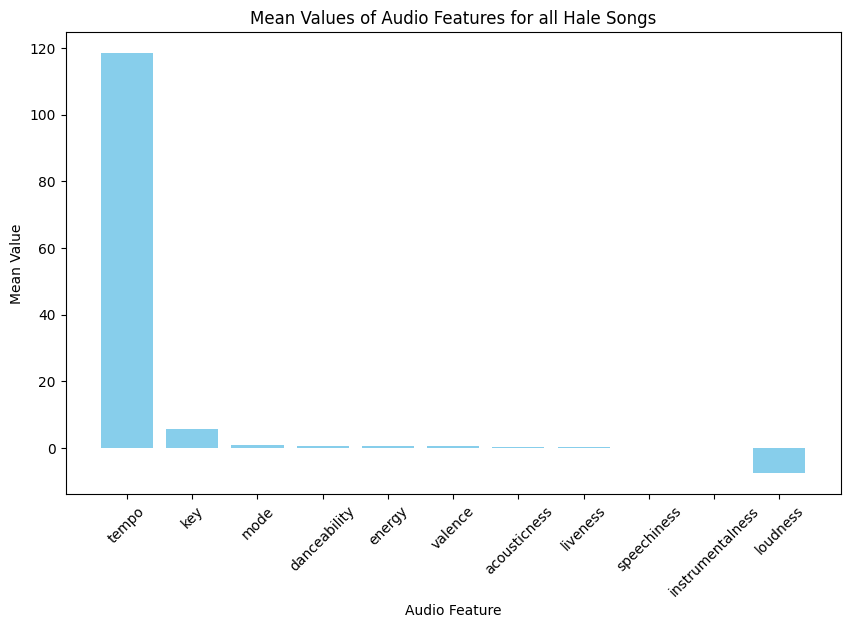

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id                         track_name  \
92  00Apys6jYrWA0Bse9Yon6O                              Crush   
19  6r3duEAfFTH83DuoywkG20                           Feelings   
54  0EcQcdcbQeVJn9fknj44Be                   I Like Me Better   
88  3rmqiQbzPDx7A8p88IRFKg                   Love U Like That   
22  6mXdCcFnPKQznj4CmMRmHC                            Mean It   
70  3ZPBZH2k9p306C1bu7bkhC                          Never Not   
55  2MOoIbJWIYikwIXjBDe26i                  Paris in the Rain   
86  6R5fYCySNHrqo4Og6O1ppn  Steal The Show - From "Elemental"   
25  0pSqYDTjY1Xt86usTQslAx                                Who   
26  7LpMG3AEaIJgs62HQhAa91                    i'm so tired...   

                 artist_id   artist_name                album_id  duration  \
92  26cMerAxjx9GedFt0lMDjm  Bella Poarch  4zhSWdHOuYGS7EoJiY6PaE    175636   
19  5JZ7CnR6gTvEMKX4g70Amv          Lauv  3ZuE680xhR1A4bCFGvL8mi    189906   
54  5JZ7CnR6gTvEMKX4g70Amv          Lauv  71cQY3dUThCY6vVKaUIXqR    197436   
88  5JZ7CnR6gTvEMKX4g70Amv          Lauv  4L1fTiCm419aQYUbfRJ3mA    211733   
22  5JZ7CnR6gTvEMKX4g70Amv          Lauv  3ZuE680xhR1A4bCFGvL8mi    232853   
70  5JZ7CnR6gTvEMKX4g70Amv          Lauv  71cQY3dUThCY6vVKaUIXqR    208000   
55  5JZ7CnR6gTvEMKX4g70Amv          Lauv  71cQY3dUThCY6vVKaUIXqR    204712   
86  5JZ7CnR6gTvEMKX4g70Amv          Lauv  1rMI4GKDwtz8Ok0e7jbE4l    191779   
25  5JZ7CnR6gTvEMKX4g70Amv          Lauv  3ZuE680xhR1A4bCFGvL8mi    180413   
26  5JZ7CnR6gTvEMKX4g70Amv          Lauv  3ZuE680xhR1A4bCFGvL8mi    162586   

   release_date  popularity  danceability  energy  key  loudness  mode  \
92   2023-09-15          73         0.632   0.832   11    -3.542     0   
19   2020-03-06          72         0.700   0.394    9    -8.911     1   
54   2018-05-31          85         0.753   0.505    9    -7.621     1   
88   2023-08-04          78         0.711   0.674   10    -3.559     1   
22   2020-03-06          72         0.747   0.450    7    -8.543     1   
70   2018-05-31          73         0.471   0.220    5    -9.243     1   
55   2018-05-31          74         0.406   0.408    3    -9.419     1   
86   2023-06-02          79         0.620   0.640    7    -7.308     1   
25   2020-03-06          75         0.632   0.337   11    -8.000     0   
26   2020-03-06          78         0.548   0.735   11    -7.572     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
92       0.0465        0.2470          0.000000    0.3490   0.2890  110.025   
19       0.0328        0.0567          0.000000    0.0801   0.2410  103.041   
54       0.2550        0.5340          0.000003    0.1040   0.4190   91.972   
88       0.0317        0.0947          0.000000    0.0641   0.2530   95.000   
22       0.0919        0.0407          0.000000    0.1700   0.3290   96.001   
70       0.0370        0.6910          0.000000    0.1040   0.2600  133.714   
55       0.0530        0.7710          0.000008    0.3940   0.5250   79.705   
86       0.0305        0.3410          0.001250    0.1400   0.4090   92.522   
25       0.0330        0.5580          0.000000    0.1040   0.0982  141.701   
26       0.2360        0.1730          0.000000    0.1950   0.4980  101.252   

                                 album_name  
92                                  Singles  
19                        ~how i'm feeling~  
54  I met you when I was 18. (the playlist)  
88                                  Singles  
22                        ~how i'm feeling~  
70  I met you when I was 18. (the playlist)  
55  I met you when I was 18. (the playlist)  
86                                  Singles  
25                        ~how i'm feeling~  
26                        ~how i'm feeling~

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


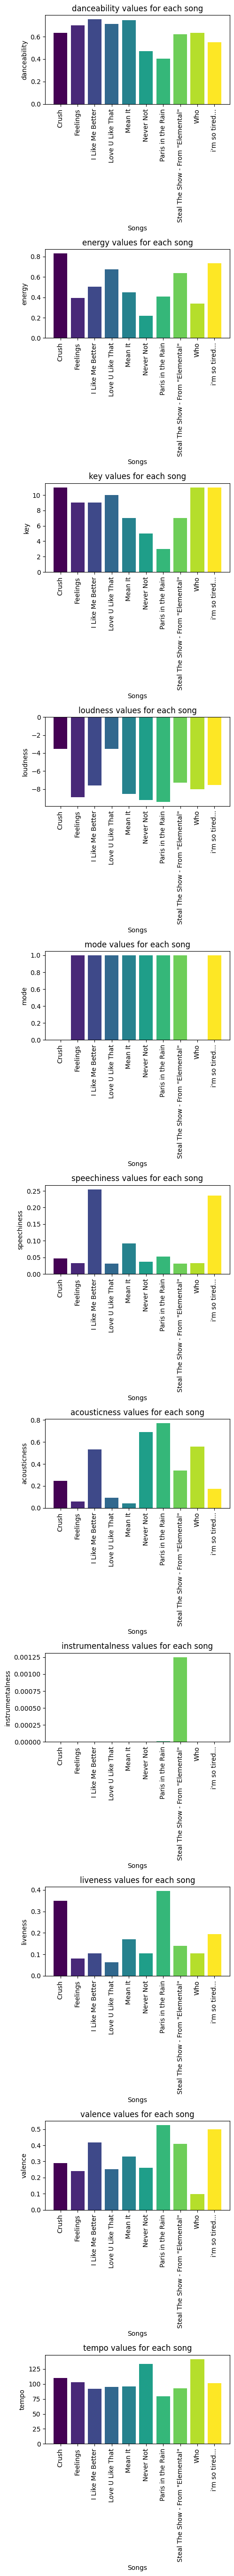

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Noah Cyrus

In [ ]:
artist_id = '55fhWPvDiMpLnE4ZzNXZyW'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/55fhWPvDiMpLnE4ZzNXZyW'},
 'followers': {'href': None, 'total': 1221773},
 'genres': ['alt z', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/55fhWPvDiMpLnE4ZzNXZyW',
 'id': '55fhWPvDiMpLnE4ZzNXZyW',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebb27124cea846fa1154cc58e1',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174b27124cea846fa1154cc58e1',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178b27124cea846fa1154cc58e1',
   'width': 160}],
 'name': 'Noah Cyrus',
 'popularity': 70,
 'type': 'artist',
 'uri': 'spotify:artist:55fhWPvDiMpLnE4ZzNXZyW'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

July
July (feat. Leon Bridges)
All Falls Down (feat. Juliander)
Again (feat. XXXTENTACION)
Lonely
Dear August
Make Me (Cry)
I Burned LA Down
Young & Sad
Everybody Needs Someone (feat. Vance Joy)


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: The Hardest Part (Deluxe), Album ID: 7jeMBMO8h8d3H7opdsNfIy
Album Name: The Hardest Part, Album ID: 4frBxYchAwQD5z8Z6VTrF3
Album Name: THE END OF EVERYTHING, Album ID: 5Gn3fFzlWL89j0hGumtXb5


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id                                 track_name  \
0   5EcxEI6yAPYOqx9fH1kJOR                         Noah (Stand Still)   
1   48k9QVLGROepSs1dY6h5Ch                                Ready to Go   
2   2nSChtHvpmc5yFxrmqz1HC                               Mr. Percocet   
3   3hijebTGJ9fdz6gdWUmCa4                       Every Beginning Ends   
4   4mhWIJNHl9os6RrWu9wQXs                               Hardest Part   
5   2RDKxrjmVMYSu1XEJyLtWY                        I Just Want a Lover   
6   1HSqE7O4rYKSuGpskJj9Yo                                 Unfinished   
7   6qj7dw8WJZRQHnHdjmwFxi                         My Side of the Bed   
8   0Yfk3uIuP6ueTOpUoWmTKx                           I Burned LA Down   
9   6xJ0tKuaFKC1QCwZnALBxO                             Loretta's Song   
10  04ugimC77USlKwem4C07s1                         Noah (Stand Still)   
11  5xvNHwt7SThqmYDs5IyTWR                      Unfinished - Acoustic   
12  39387H7jHsgL1chbERUJSZ           Ready to Go - String Arrangement   
13  49RfgtThLG2uxOoTMBXrTr           Hardest Part - Bluegrass Version   
14  0nIAgiSRRNZBNSbgeZ9ERB          I Burned LA Down - Choral Version   
15  6W9w3qHhJMALd82l6do6F3                               Set For Life   
16  62Gah07tkuKq3sNebDpCJN                         Noah (Stand Still)   
17  5qkZ6PPFjweR2yOKUGUDX3                                Ready to Go   
18  3ONe6SKdO3uRrWLsZePF1p                               Mr. Percocet   
19  4iAjjXGCKNQCtFklN48w7n                       Every Beginning Ends   
20  4DD7dYiv3gBc7H2CJFVptm                               Hardest Part   
21  6whql8yh4n96c8Zl4MYkVG                        I Just Want a Lover   
22  2pOds6Kh8EFPgJj12UmPKR                                 Unfinished   
23  2Vi4P0MqWTI56nynCpSgvw                         My Side of the Bed   
24  4dEUEEbO25gBn2s9dASnYi                           I Burned LA Down   
25  38EJLUMRAXnBWhuR5EksB8                             Loretta's Song   
26  1Px3ZJmn86lFeKEKqfgmcW                         Noah (Stand Still)   
27  14C0PdFGQR6LFr2UqHmNQm                      Unfinished - Acoustic   
28  4bl5qvLNSJng48smi0uVO7                                      Ghost   
29  3zQikNPCgTVnQLmj5RPn1k             I Got So High That I Saw Jesus   
30  0AXB2KmgSGjB886FJglrgJ                                       Liar   
31  6U1iuA5QfzYRPJxvdcxqtf                                     Lonely   
32  2aav0K63pZ1x2mEj0aDGat                                Young & Sad   
33  6J2LdBN97cDWn0MLxYh9HB                                       July   
34  2M8JffLDYXcGBAnaYB7bVz           Wonder Years (feat. Ant Clemons)   
35  3Svynwi8VIgkDKQQiEPYCB                      The End of Everything   
37  3V0nnQhqvbE3JmiDdnzQFQ                  July (feat. Leon Bridges)   
38  1HvCFAUIWQsWV9zud3UhDl           All Falls Down (feat. Juliander)   
39  2S2od3hT7ceytw7d1pTRuE                 Again (feat. XXXTENTACION)   
41  16gW9O8A4rIMx5OOVlzsSn                                Dear August   
42  2BrzlUj1u1CtvaJDGIKpsP                              Make Me (Cry)   
44  0gySkOOewOdZtHG8stPEB8                                Young & Sad   
45  2TZKvEQyTtcXLBfAk7kt8n  Everybody Needs Someone (feat. Vance Joy)   

                 artist_id  artist_name                album_id  duration  \
0   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    234531   
1   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    187759   
2   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    193973   
3   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    150491   
4   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    222586   
5   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    201463   
6   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    233369   
7   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    186350   
8   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    195252   
9   55fhWPvDiMpLnE4ZzNXZyW   Noah C

In [ ]:
csv_filename = 'noah_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                                 track_name  \
39  2S2od3hT7ceytw7d1pTRuE                 Again (feat. XXXTENTACION)   
38  1HvCFAUIWQsWV9zud3UhDl           All Falls Down (feat. Juliander)   
41  16gW9O8A4rIMx5OOVlzsSn                                Dear August   
3   3hijebTGJ9fdz6gdWUmCa4                       Every Beginning Ends   
19  4iAjjXGCKNQCtFklN48w7n                       Every Beginning Ends   
45  2TZKvEQyTtcXLBfAk7kt8n  Everybody Needs Someone (feat. Vance Joy)   
28  4bl5qvLNSJng48smi0uVO7                                      Ghost   
4   4mhWIJNHl9os6RrWu9wQXs                               Hardest Part   
20  4DD7dYiv3gBc7H2CJFVptm                               Hardest Part   
13  49RfgtThLG2uxOoTMBXrTr           Hardest Part - Bluegrass Version   
8   0Yfk3uIuP6ueTOpUoWmTKx                           I Burned LA Down   
24  4dEUEEbO25gBn2s9dASnYi                           I Burned LA Down   
14  0nIAgiSRRNZBNSbgeZ9ERB          I Burned LA Down - Choral Version   
29  3zQikNPCgTVnQLmj5RPn1k             I Got So High That I Saw Jesus   
21  6whql8yh4n96c8Zl4MYkVG                        I Just Want a Lover   
5   2RDKxrjmVMYSu1XEJyLtWY                        I Just Want a Lover   
33  6J2LdBN97cDWn0MLxYh9HB                                       July   
37  3V0nnQhqvbE3JmiDdnzQFQ                  July (feat. Leon Bridges)   
30  0AXB2KmgSGjB886FJglrgJ                                       Liar   
31  6U1iuA5QfzYRPJxvdcxqtf                                     Lonely   
9   6xJ0tKuaFKC1QCwZnALBxO                             Loretta's Song   
25  38EJLUMRAXnBWhuR5EksB8                             Loretta's Song   
42  2BrzlUj1u1CtvaJDGIKpsP                              Make Me (Cry)   
2   2nSChtHvpmc5yFxrmqz1HC                               Mr. Percocet   
18  3ONe6SKdO3uRrWLsZePF1p                               Mr. Percocet   
7   6qj7dw8WJZRQHnHdjmwFxi                         My Side of the Bed   
23  2Vi4P0MqWTI56nynCpSgvw                         My Side of the Bed   
0   5EcxEI6yAPYOqx9fH1kJOR                         Noah (Stand Still)   
26  1Px3ZJmn86lFeKEKqfgmcW                         Noah (Stand Still)   
10  04ugimC77USlKwem4C07s1                         Noah (Stand Still)   
16  62Gah07tkuKq3sNebDpCJN                         Noah (Stand Still)   
17  5qkZ6PPFjweR2yOKUGUDX3                                Ready to Go   
1   48k9QVLGROepSs1dY6h5Ch                                Ready to Go   
12  39387H7jHsgL1chbERUJSZ           Ready to Go - String Arrangement   
15  6W9w3qHhJMALd82l6do6F3                               Set For Life   
35  3Svynwi8VIgkDKQQiEPYCB                      The End of Everything   
6   1HSqE7O4rYKSuGpskJj9Yo                                 Unfinished   
22  2pOds6Kh8EFPgJj12UmPKR                                 Unfinished   
11  5xvNHwt7SThqmYDs5IyTWR                      Unfinished - Acoustic   
27  14C0PdFGQR6LFr2UqHmNQm                      Unfinished - Acoustic   
34  2M8JffLDYXcGBAnaYB7bVz           Wonder Years (feat. Ant Clemons)   
32  2aav0K63pZ1x2mEj0aDGat                                Young & Sad   
44  0gySkOOewOdZtHG8stPEB8                                Young & Sad   

                 artist_id  artist_name                album_id  duration  \
39  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5UD36hu4fYZ6R8b8crkKL7    193961   
38  7vk5e3vY1uw9plTHJAMwjN  Alan Walker  3nzuGtN3nXARvvecier4K0    198880   
41  1RryIbDjpwt00AKkSpCGvP   PJ Harding  6gaOMLivdMhiFaTuPqTmgj    200940   
3   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    150491   
19  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  4frBxYchAwQD5z8Z6VTrF3    150491   
45  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5eWIV7Xa9H7aeciqMgMKNZ    178819   
28  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5Gn3fFzlWL89j0hGumtXb5    185454   
4   55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  7jeMBMO8h8d3H7opdsNfIy    222586   
20  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  4frBxYchAwQD5z8Z6VTrF3    222586   
13  55fhWPvDiMpLnE4ZzNXZyW   Noah C

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  119.050419
1                key    4.418605
2               mode    0.790698
3       danceability    0.537209
4       acousticness    0.470774
5             energy    0.445814
6            valence    0.337544
7           liveness    0.141995
8        speechiness    0.040198
9   instrumentalness    0.000907
10          loudness   -8.357930

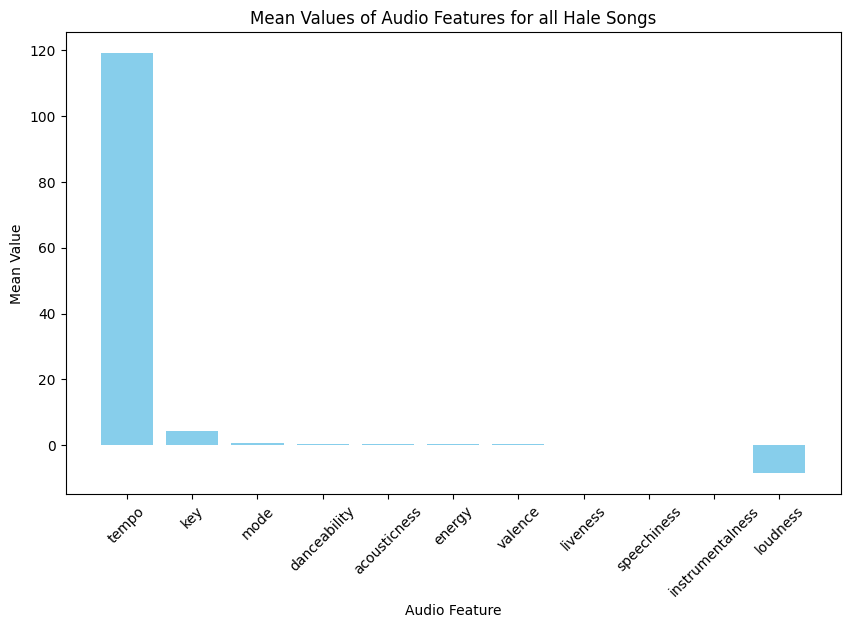

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id                        track_name  \
39  2S2od3hT7ceytw7d1pTRuE        Again (feat. XXXTENTACION)   
38  1HvCFAUIWQsWV9zud3UhDl  All Falls Down (feat. Juliander)   
41  16gW9O8A4rIMx5OOVlzsSn                       Dear August   
33  6J2LdBN97cDWn0MLxYh9HB                              July   
37  3V0nnQhqvbE3JmiDdnzQFQ         July (feat. Leon Bridges)   
31  6U1iuA5QfzYRPJxvdcxqtf                            Lonely   

                 artist_id  artist_name                album_id  duration  \
39  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5UD36hu4fYZ6R8b8crkKL7    193961   
38  7vk5e3vY1uw9plTHJAMwjN  Alan Walker  3nzuGtN3nXARvvecier4K0    198880   
41  1RryIbDjpwt00AKkSpCGvP   PJ Harding  6gaOMLivdMhiFaTuPqTmgj    200940   
33  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5Gn3fFzlWL89j0hGumtXb5    156106   
37  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  3tRmxSQyoyXXwcVDcUFQic    152280   
31  55fhWPvDiMpLnE4ZzNXZyW   Noah Cyrus  5Gn3fFzlWL89j0hGumtXb5    144377   

   release_date  popularity  danceability  energy  key  loudness  mode  \
39   2017-09-22          72         0.664   0.738    9    -4.095     0   
38   2018-12-14          69         0.655   0.672    1    -4.966     1   
41   2021-02-12          69         0.643   0.324    0    -7.817     1   
33   2020-05-15          83         0.708   0.186    9    -8.953     0   
37   2019-11-08          76         0.708   0.211    9    -9.603     0   
31   2020-05-15          70         0.530   0.281    5    -8.274     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
39       0.0338         0.188          0.000058    0.1350    0.203  119.973   
38       0.0581         0.253          0.000000    0.3120    0.675   98.005   
41       0.0338         0.800          0.000000    0.1110    0.444  147.019   
33       0.0420         0.868          0.000000    0.0779    0.322   72.541   
37       0.0424         0.853          0.000000    0.1310    0.362   72.500   
31       0.0577         0.798          0.000000    0.0928    0.341  122.442   

               album_name  
39                Singles  
38                Singles  
41                Singles  
33  THE END OF EVERYTHING  
37                Singles  
31  THE END OF EVERYTHING

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


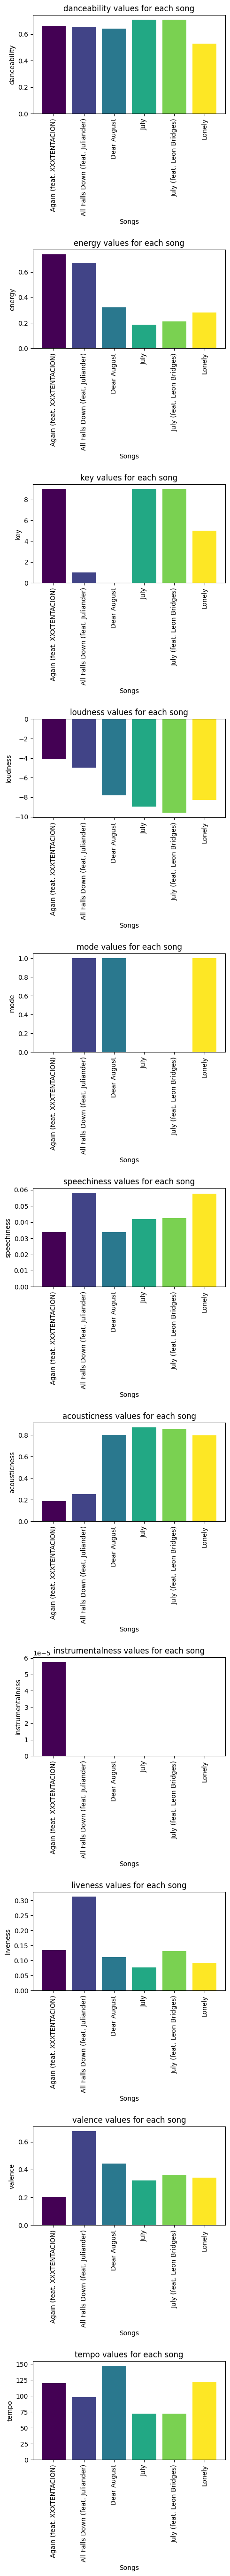

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Maroon 5

In [ ]:
artist_id = '04gDigrS5kc9YWfZHwBETP'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/04gDigrS5kc9YWfZHwBETP'},
 'followers': {'href': None, 'total': 41447472},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/04gDigrS5kc9YWfZHwBETP',
 'id': '04gDigrS5kc9YWfZHwBETP',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebf8349dfb619a7f842242de77',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174f8349dfb619a7f842242de77',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178f8349dfb619a7f842242de77',
   'width': 160}],
 'name': 'Maroon 5',
 'popularity': 84,
 'type': 'artist',
 'uri': 'spotify:artist:04gDigrS5kc9YWfZHwBETP'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

Payphone
Maps
Moves Like Jagger - Studio Recording From "The Voice" Performance
Memories
Sugar
Animals
She Will Be Loved - Radio Mix
This Love
One More Night
Beautiful Mistakes (feat. Megan Thee Stallion)


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: Overexposed, Album ID: 5x7JzoE4A3DwwU6FPt8qws
Album Name: JORDI (Deluxe), Album ID: 1pCA38N6MkLlthXtAOvZTU
Album Name: Red Pill Blues (Deluxe), Album ID: 3ThQ5dvf9wlqB0C7evh5nH
Album Name: V (Deluxe), Album ID: 7cVkMpmcdlEo67aMmffyoU
Album Name: V, Album ID: 2Auw0pTT6EcQdvHNimhLQI
Album Name: Overexposed (Deluxe), Album ID: 2pjfMmH52fryXVQuWTWOgP
Album Name: Hands All Over (Deluxe), Album ID: 5kygdThrNHarL5gnO2jMOt
Album Name: It Won't Be Soon Before Long. (MTV Bonus Version), Album ID: 2FNYaSxnB6sLUtbDhRY0eU
Album Name: Call And Response: The Remix Album, Album ID: 1btcxe4BlA1oqaBXQhd5zm
Album Name: Live Friday The 13th, Album ID: 07hPT8Ndirhuv2NeurOD6C
Album Name: It Won't Be Soon Before Long., Album ID: 29hJ8AFYZU98OzenrMr6iU
Album Name: 1.22.03 Acoustic, Album ID: 0BCjGDBIymcwf4etd4KBgu
Album Name: Songs About Jane, Album ID: 1Rv9WRKyYhFaGbuYDaQunN
Album Name: Songs About Jane: 10th Anniversary Edition, Album ID: 5zClcGCSWj926AMjvBNSLc


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id  \
0    423oRmTgCWl8nF9Oac1fvA   
1    1LmN9SSHISbtp9LoaR5ZVJ   
2    2l8D5dB5pXywjeIeWw16E7   
3    6tVrmsbI5HVDgOlFSTrQjB   
4    1GpqVTiLDdIeDeX5PrpPDX   
..                      ...   
204  39gJMnnXw8x2Im44B8BM3P   
205  4PPgUdOaHiGBEswMhwSziB   
206  1hbbMyfgxjcFrW2v4ll8uQ   
207  0ecxQl1Uij06vO9S7htIVI   
210  7LcfRTgAVTs5pQGEQgUEzN   

                                            track_name  \
0                                       One More Night   
1                                             Payphone   
2                                             Daylight   
3                                         Lucky Strike   
4                               The Man Who Never Lied   
..                                                 ...   
204  Ragdoll - Original Demo/Non-LP International B...   
205                                       Woman - Demo   
206                               Chilly Winter - Demo   
207                            The Sun - Alternate Mix   
210  Moves Like Jagger - Studio Recording From "The...   

                  artist_id artist_name                album_id  duration  \
0    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    219466   
1    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    231386   
2    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    225400   
3    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    185280   
4    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    205200   
..                      ...         ...                     ...       ...   
204  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    328693   
205  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    246213   
206  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    175106   
207  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    256680   
210  04gDigrS5kc9YWfZHwBETP    Maroon 5  7strNUlU6xZqlVWBNUdOYv    201160   

    release_date  popularity  danceability  energy  key  loudness  mode  \
0     2021-06-20          47         0.718   0.820    5    -3.453     0   
1     2021-06-20          70         0.739   0.756    4    -4.828     1   
2     2021-06-20          43         0.662   0.670    2    -5.504     1   
3     2021-06-20          49         0.674   0.740   11    -4.517     0   
4     2021-06-20          35         0.627   0.848    2    -5.989     1   
..           ...         ...           ...     ...  ...       ...   ...   
204         2002          35         0.718   0.576    7    -5.244     1   
205         2002          34         0.774   0.604    9    -9.445     0   
206         2002          31         0.793   0.489    0    -9.254     1   
207         2002          33         0.618   0.805    7    -4.962     1   
210         2010          74         0.722   0.758   11    -4.477     0   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0         0.0323      0.044400          0.000000    0.0846    0.613   92.998   
1         0.0394      0.013600          0.000000    0.3700    0.523  110.028   
2         0.0270      0.002200          0.000000    0.2030    0.352  119.977   
3         0.0419      0.000637          0.000000    0.1110    0.431  143.998   
4         0.0351      0.000388          0.000000    0.0716    0.848  139.954   
..           ...           ...               ...       ...      ...      ...   
204       0.0342      0.333000          0.000003    0.0965    0.361  121.699   
205       0.1310      0.227000          0.002680    0.0646    0.780  173.998   
206       0.0358      0.083100          0.000444    0.1110    0.793  136.009   
207       0.0378      0.017500          0.000000    0.0455    0.476   80.024   
210       0.0471      0.011100          0.000000    0.3080    0.620  128.047   

                                     album_name  
0                                   Overexposed  
1                                   Overexposed  
2           

In [ ]:
csv_filename = 'maroon5_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                 track_name  \
43   5s8TNhF23nv2Pumf0JTe2i                    Animals   
58   2bL2gyO6kBdLkNSkxXNh6x                    Animals   
159  1UvGv4XWZrVDrxbGKJfA0p          Back At Your Door   
114  7n5CIroA7sqhXiyEJ3Fx4j          Back At Your Door   
80   62FOsBpnZXEoPc1Qo9hcap          Beautiful Goodbye   
..                      ...                        ...   
81   1c2MXiju7DNPSfsKoVbHlg             Wipe Your Eyes   
205  4PPgUdOaHiGBEswMhwSziB               Woman - Demo   
131  3NPQFM3LRycBk6PxVlT1eL   Woman - Sam Farrar Remix   
107  3fEOgd4l1yNyp6B5rlfjvq  Won't Go Home Without You   
152  0tuyEYTaqLxE41yGHSsXjy  Won't Go Home Without You   

                  artist_id artist_name                album_id  duration  \
43   04gDigrS5kc9YWfZHwBETP    Maroon 5  7cVkMpmcdlEo67aMmffyoU    231013   
58   04gDigrS5kc9YWfZHwBETP    Maroon 5  2Auw0pTT6EcQdvHNimhLQI    231013   
159  04gDigrS5kc9YWfZHwBETP    Maroon 5  29hJ8AFYZU98OzenrMr6iU    226826   
114  04gDigrS5kc9YWfZHwBETP    Maroon 5  2FNYaSxnB6sLUtbDhRY0eU    226826   
80   04gDigrS5kc9YWfZHwBETP    Maroon 5  2pjfMmH52fryXVQuWTWOgP    255266   
..                      ...         ...                     ...       ...   
81   04gDigrS5kc9YWfZHwBETP    Maroon 5  2pjfMmH52fryXVQuWTWOgP    214853   
205  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    246213   
131  04gDigrS5kc9YWfZHwBETP    Maroon 5  1btcxe4BlA1oqaBXQhd5zm    251853   
107  04gDigrS5kc9YWfZHwBETP    Maroon 5  2FNYaSxnB6sLUtbDhRY0eU    231173   
152  04gDigrS5kc9YWfZHwBETP    Maroon 5  29hJ8AFYZU98OzenrMr6iU    231173   

    release_date  popularity  danceability  energy  key  loudness  mode  \
43    2014-09-02          46         0.279   0.742    4    -6.460     0   
58    2014-09-02          83         0.279   0.742    4    -6.460     0   
159   2007-01-01          36         0.647   0.624    3    -3.415     1   
114   2008-01-01          21         0.647   0.629    3    -3.420     1   
80    2012-01-01          50         0.662   0.578    3    -2.637     1   
..           ...         ...           ...     ...  ...       ...   ...   
81    2012-01-01          41         0.608   0.909    4    -3.638     0   
205         2002          34         0.774   0.604    9    -9.445     0   
131   2008-01-01          22         0.672   0.707    7    -7.283     1   
107   2008-01-01          36         0.738   0.613    3    -3.760     1   
152   2007-01-01          65         0.737   0.615    3    -3.760     1   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
43        0.0898      0.000185          0.000000    0.5930    0.328  189.868   
58        0.0898      0.000185          0.000000    0.5930    0.328  189.868   
159       0.0263      0.019600          0.000000    0.2240    0.315  111.994   
114       0.0263      0.020600          0.000000    0.2240    0.311  111.998   
80        0.0343      0.002000          0.000002    0.1040    0.404  168.040   
..           ...           ...               ...       ...      ...      ...   
81        0.0349      0.051600          0.000000    0.1110    0.617  137.040   
205       0.1310      0.227000          0.002680    0.0646    0.780  173.998   
131       0.1250      0.049600          0.001710    0.0617    0.797  173.972   
107       0.0318      0.015400          0.000000    0.1020    0.415  110.026   
152       0.0317      0.014900          0.000000    0.1020    0.410  110.023   

                                            album_name  
43                                          V (Deluxe)  
58                                                   V  
159                      It Won't Be Soon Before Long.  
114  It Won't Be Soon Before Long. (MTV Bonus Version)  
80                                Overexposed (Deluxe)  
..                                                 ...  
81                                Overexposed (Deluxe)  
205         Songs About Jane: 10th Anniversary Edition  
131                 Ca

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  122.172072
1                key    4.985646
2             energy    0.716751
3       danceability    0.638206
4            valence    0.556492
5               mode    0.540670
6           liveness    0.237512
7       acousticness    0.122550
8        speechiness    0.059109
9   instrumentalness    0.002686
10          loudness   -5.744656

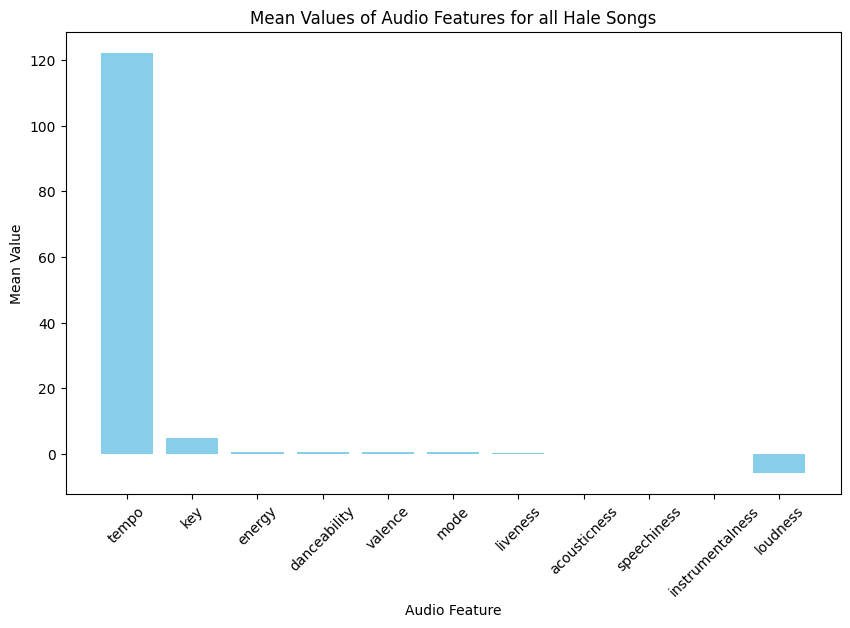

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id  \
58   2bL2gyO6kBdLkNSkxXNh6x   
12   5zFglKYiknIxks8geR8rcL   
40   7gwLQ4tZ5UdZ7qNcDyJ8wr   
39   1nueTG77MzNkJTKQ0ZdGzT   
41   6V1bu6o1Yo5ZXnsCJU8Ovk   
179  4V9JDRqKjN8F2HWdlEDxvI   
57   4gbVRS8gloEluzf0GzDOFc   
22   4cktbXiXOapiLBMprHFErI   
210  7LcfRTgAVTs5pQGEQgUEzN   
20   2ST72jD2KVe7f3fbcGyX1b   
69   4XNrMwGx1SqP01sqkGTDmo   
70   4P0osvTXoSYZZC2n8IFH3c   
1    1LmN9SSHISbtp9LoaR5ZVJ   
170  7sapKrjDij2fpDVj0GxP66   
162  2sLS4tVaEoMYrNS67PVz0V   
182  4llK75pXNWZz6KAho2Gp16   
61   2iuZJX9X9P0GKaE93xcPjk   
174  1YI0uK36eupTmw9F8kHysr   
186  5qII2n90lVdPDcgXEEVHNy   
161  3bXhtg6H8lOMWaLZttQF6F   
180  6ECp64rv50XVz93WvxXMGF   
168  6YgV0EF8xJMZz0Zm6BTaT4   
27   2j5hsQvApottzvTn4pFJWF   
152  0tuyEYTaqLxE41yGHSsXjy   

                                            track_name  \
58                                             Animals   
12      Beautiful Mistakes (feat. Megan Thee Stallion)   
40                                 Cold (feat. Future)   
39             Don't Wanna Know (feat. Kendrick Lamar)   
41    Girls Like You (feat. Cardi B) - Cardi B Version   
179                                  Harder To Breathe   
57                                                Maps   
22                                            Memories   
210  Moves Like Jagger - Studio Recording From "The...   
20                                       Nobody's Love   
69                                      One More Night   
70                                            Payphone   
1                                             Payphone   
170                                  She Will Be Loved   
162                       She Will Be Loved - Acoustic   
182                      She Will Be Loved - Radio Mix   
61                                               Sugar   
174                                     Sunday Morning   
186                                     Sunday Morning   
161                          Sunday Morning - Acoustic   
180                                          This Love   
168                                          This Love   
27                          What Lovers Do (feat. SZA)   
152                          Won't Go Home Without You   

                  artist_id artist_name                album_id  duration  \
58   04gDigrS5kc9YWfZHwBETP    Maroon 5  2Auw0pTT6EcQdvHNimhLQI    231013   
12   04gDigrS5kc9YWfZHwBETP    Maroon 5  1pCA38N6MkLlthXtAOvZTU    227395   
40   04gDigrS5kc9YWfZHwBETP    Maroon 5  3ThQ5dvf9wlqB0C7evh5nH    234308   
39   04gDigrS5kc9YWfZHwBETP    Maroon 5  3ThQ5dvf9wlqB0C7evh5nH    214265   
41   04gDigrS5kc9YWfZHwBETP    Maroon 5  3ThQ5dvf9wlqB0C7evh5nH    235545   
179  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    173693   
57   04gDigrS5kc9YWfZHwBETP    Maroon 5  2Auw0pTT6EcQdvHNimhLQI    189960   
22   04gDigrS5kc9YWfZHwBETP    Maroon 5  1pCA38N6MkLlthXtAOvZTU    189486   
210  04gDigrS5kc9YWfZHwBETP    Maroon 5  7strNUlU6xZqlVWBNUdOYv    201160   
20   04gDigrS5kc9YWfZHwBETP    Maroon 5  1pCA38N6MkLlthXtAOvZTU    211253   
69   04gDigrS5kc9YWfZHwBETP    Maroon 5  2pjfMmH52fryXVQuWTWOgP    219466   
70   04gDigrS5kc9YWfZHwBETP    Maroon 5  2pjfMmH52fryXVQuWTWOgP    231386   
1    04gDigrS5kc9YWfZHwBETP    Maroon 5  5x7JzoE4A3DwwU6FPt8qws    231386   
170  04gDigrS5kc9YWfZHwBETP    Maroon 5  1Rv9WRKyYhFaGbuYDaQunN    257133   
162  04gDigrS5kc9YWfZHwBETP    Maroon 5  0BCjGDBIymcwf4etd4KBgu    276786   
182  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    259453   
61   04gDigrS5kc9YWfZHwBETP    Maroon 5  2Auw0pTT6EcQdvHNimhLQI    235493   
174  04gDigrS5kc9YWfZHwBETP    Maroon 5  1Rv9WRKyYhFaGbuYDaQunN    244866   
186  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    244880   
161  04gDigrS5kc9YWfZHwBETP    Maroon 5  0BCjGDBIymcwf4etd4KBgu    254853   
180  04gDigrS5kc9YWfZHwBETP    Maroon 5  5zClcGCSWj926AMjvBNSLc    206200   
168  04gDigrS5kc9YWfZHwBETP    Maroon 5  1Rv9WRKyYhFaGbuYDaQunN    206200   
27   04gDigrS5kc9YWfZ

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


<ipython-input-182-3bbcae8b45b8>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


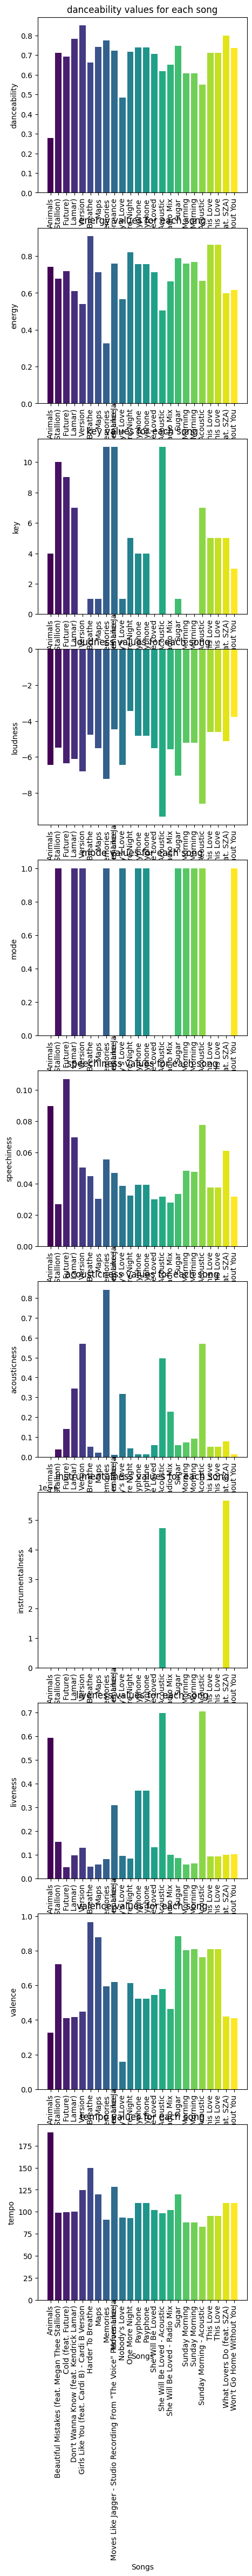

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Julia Michaels

In [ ]:
artist_id = '0ZED1XzwlLHW4ZaG4lOT6m'

artist_info = sp.artist(artist_id)

artist_info

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0ZED1XzwlLHW4ZaG4lOT6m'},
 'followers': {'href': None, 'total': 5086869},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/0ZED1XzwlLHW4ZaG4lOT6m',
 'id': '0ZED1XzwlLHW4ZaG4lOT6m',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb2c17882893491af059fb867e',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051742c17882893491af059fb867e',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1782c17882893491af059fb867e',
   'width': 160}],
 'name': 'Julia Michaels',
 'popularity': 73,
 'type': 'artist',
 'uri': 'spotify:artist:0ZED1XzwlLHW4ZaG4lOT6m'}

In [ ]:
print_dict_structure(artist_info)

external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
genres: List
  List Item
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
popularity: int
type: str
uri: str


In [ ]:
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
    print(track['name'])

If the World Was Ending (feat. Julia Michaels)
What A Time (feat. Niall Horan)
Issues
Heaven
Hurt Somebody
In A Perfect World (with Julia Michaels)
I Miss You (feat. Julia Michaels)
GONE
There's No Way (feat. Julia Michaels)
Issues - Acoustic


In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
for album in albums['items']:
    album_name = album['name']
    album_id = album['id']  # Get the album ID
    print(f"Album Name: {album_name}, Album ID: {album_id}")

Album Name: Not In Chronological Order, Album ID: 0tDLeJartXoM4ACuUx2MOu
Album Name: Inner Monologue Part 2, Album ID: 2f4Ejh4Po2rpuXSYa6IDCe
Album Name: Nervous System, Album ID: 1qyjZGIeeLJlXbYWuoloWj


In [ ]:
# Use the sp.artist_albums method to get the albums for the artist
albums = sp.artist_albums(artist_id, album_type='album')  # 'album' type retrieves the artist's albums

# Now, 'albums' contains a list of albums by the specified artist
album_ids = [album['id'] for album in albums['items']]  # Get a list of album IDs

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)  # Append the track's audio features to the list

In [ ]:
# all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# # First, retrieve audio features for tracks in albums
# for album_id in album_ids:
#     # Use the sp.album_tracks method to get the tracks for the album
#     tracks = sp.album_tracks(album_id)

#     # Iterate through the tracks and get their audio features using your custom function
#     for track in tracks['items']:
#         track_id = track['id']
#         track_data = get_track_data(track_id)  # Your custom function
#         all_album_audio_features.append(track_data)

# # Next, retrieve audio features for the artist's top tracks (including singles)
# top_tracks = sp.artist_top_tracks(artist_id)

# # Iterate through the top tracks and get their audio features
# for track in top_tracks['tracks']:
#     track_id = track['id']
#     track_data = get_track_data(track_id)  # Your custom function
#     all_album_audio_features.append(track_data)

In [ ]:
all_album_audio_features = []  # This list will store audio features for all tracks in all albums

# First, retrieve audio features for tracks in albums
for album_id in album_ids:
    # Use the sp.album_tracks method to get the tracks for the album
    tracks = sp.album_tracks(album_id)

    # Get the album name
    album_info = sp.album(album_id)
    album_name = album_info['name']

    # Iterate through the tracks and get their audio features using your custom function
    for track in tracks['items']:
        track_id = track['id']
        track_data = get_track_data(track_id)  # Your custom function
        track_data['album_name'] = album_name  # Add the album name to the track data
        all_album_audio_features.append(track_data)

# Next, retrieve audio features for the artist's top tracks (including singles)
top_tracks = sp.artist_top_tracks(artist_id)

# Iterate through the top tracks and get their audio features
for track in top_tracks['tracks']:
    track_id = track['id']
    track_data = get_track_data(track_id)  # Your custom function
    track_data['album_name'] = 'Singles'  # If it's a single, you can specify 'Singles' as the album name
    all_album_audio_features.append(track_data)

In [ ]:
discog_audio_features = pd.DataFrame(all_album_audio_features)
discog_audio_features = discog_audio_features.drop_duplicates(subset='track_id')
discog_audio_features

track_id                                      track_name  \
0   0sm5R6MjXORjLcs1bulN6n                                   All Your Exes   
1   1g5pB9oVpLUM7dxhGhCOke                                   Love Is Weird   
2   5YAkSJQDoAPx0zGgo8vHU2                                       Pessimist   
3   6En4n38HDSmtGxQJu2Tekp                               Little Did I Know   
4   08Ov5PSmldmPxZDGufK6Pj                                    Orange Magic   
5   1rqIA9CG4Vj44JYVqBpxIj                                   Lie Like This   
6   433GlmCc3VnUHqogFFQzq9                                  Wrapped Around   
7   0c35qjZXDGTkNHXUlIc6tY                                         History   
8   0JeAo18bs3edkTQ30aZtih                                       Undertone   
9   3LS7eIJfb4eajXcqbnlN2b                        That's The Kind Of Woman   
10  0ND8rF8oirMXtE59n585P6                                              17   
11  5AmTHXOp1sTFkYZBRBQ7zt                                Falling For Boys   
12  3JPXFD2aJ4dHPMnGwo41bO                                      Hurt Again   
13  508FoYYfy1YjC6ZVUMctZJ                                   Work Too Much   
14  2GmPIJzviXYtkTKYYUlloB                                            Body   
15  6VAlmgM31jc1K7SZrmECRS                                          Priest   
16  3i8JuT3Ffr45hfi239ypOQ                                Fucked Up, Kinda   
17  4EJNfCtXrx3TFwKBsf3pMl                          Shouldn't Have Said It   
18  7vu0JkJh0ldukEYbTVcqd0                                          Issues   
19  0oiKDZUxZn9i4jCCDmbTM2                                          Uh Huh   
20  1FY8gDAydm8CfGYp7Lv9ce                                     Worst In Me   
21  2XZ1I5xCHe38XOvfpMRY5e                               Make It Up To You   
22  4uuHR1fbRQZxySKHr6mEzB                                      Just Do It   
23  4mmpBLrld3UTeSNv8cMuz9                                            Pink   
24  0ufEVwujjfht29nMSWWefR                               Don't Wanna Think   
25  77MdvMx9L4ZQuLhhn3o21h  If the World Was Ending (feat. Julia Michaels)   
26  5WtfUKzXircvW8l5aaVZWT                 What A Time (feat. Niall Horan)   
28  6eJ2rRy68QOduhNLW3M1Yy                                          Heaven   
29  2Zg0aB5oVQlbQE1vzQmIIY                                   Hurt Somebody   
30  2ibGdhv3nTO89VN9KR7N2H        In A Perfect World (with Julia Michaels)   
31  0Ult84lvFuqNvbyXwyRQ58               I Miss You (feat. Julia Michaels)   
32  2LCGFBu1ej6zt4r1VGPjny                                            GONE   
33  3F7bhRhNpY4YKrwa4kGeUz           There's No Way (feat. Julia Michaels)   
34  4TqiKcUUvK7y6x6JG5NpJX                               Issues - Acoustic   

                 artist_id     artist_name                album_id  duration  \
0   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    209275   
1   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    150393   
2   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    197829   
3   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    196253   
4   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    173937   
5   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    218382   
6   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    163281   
7   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    139625   
8   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    196070   
9   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    134684   
10  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    182800   
11  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    183720   
12  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    202320   
13  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    197346   
14  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    180293   
15  0ZE

In [ ]:
csv_filename = 'julia_discog_audio_features.csv'

# Use the to_csv method to save the DataFrame to the CSV file in the current working directory
discog_audio_features.to_csv(csv_filename, index=False)

In [ ]:
df = discog_audio_features.copy()

In [ ]:
df = df.sort_values(by='track_name', ascending=True)
df

track_id                                      track_name  \
10  0ND8rF8oirMXtE59n585P6                                              17   
0   0sm5R6MjXORjLcs1bulN6n                                   All Your Exes   
14  2GmPIJzviXYtkTKYYUlloB                                            Body   
24  0ufEVwujjfht29nMSWWefR                               Don't Wanna Think   
11  5AmTHXOp1sTFkYZBRBQ7zt                                Falling For Boys   
16  3i8JuT3Ffr45hfi239ypOQ                                Fucked Up, Kinda   
32  2LCGFBu1ej6zt4r1VGPjny                                            GONE   
28  6eJ2rRy68QOduhNLW3M1Yy                                          Heaven   
7   0c35qjZXDGTkNHXUlIc6tY                                         History   
12  3JPXFD2aJ4dHPMnGwo41bO                                      Hurt Again   
29  2Zg0aB5oVQlbQE1vzQmIIY                                   Hurt Somebody   
31  0Ult84lvFuqNvbyXwyRQ58               I Miss You (feat. Julia Michaels)   
25  77MdvMx9L4ZQuLhhn3o21h  If the World Was Ending (feat. Julia Michaels)   
30  2ibGdhv3nTO89VN9KR7N2H        In A Perfect World (with Julia Michaels)   
18  7vu0JkJh0ldukEYbTVcqd0                                          Issues   
34  4TqiKcUUvK7y6x6JG5NpJX                               Issues - Acoustic   
22  4uuHR1fbRQZxySKHr6mEzB                                      Just Do It   
5   1rqIA9CG4Vj44JYVqBpxIj                                   Lie Like This   
3   6En4n38HDSmtGxQJu2Tekp                               Little Did I Know   
1   1g5pB9oVpLUM7dxhGhCOke                                   Love Is Weird   
21  2XZ1I5xCHe38XOvfpMRY5e                               Make It Up To You   
4   08Ov5PSmldmPxZDGufK6Pj                                    Orange Magic   
2   5YAkSJQDoAPx0zGgo8vHU2                                       Pessimist   
23  4mmpBLrld3UTeSNv8cMuz9                                            Pink   
15  6VAlmgM31jc1K7SZrmECRS                                          Priest   
17  4EJNfCtXrx3TFwKBsf3pMl                          Shouldn't Have Said It   
9   3LS7eIJfb4eajXcqbnlN2b                        That's The Kind Of Woman   
33  3F7bhRhNpY4YKrwa4kGeUz           There's No Way (feat. Julia Michaels)   
19  0oiKDZUxZn9i4jCCDmbTM2                                          Uh Huh   
8   0JeAo18bs3edkTQ30aZtih                                       Undertone   
26  5WtfUKzXircvW8l5aaVZWT                 What A Time (feat. Niall Horan)   
13  508FoYYfy1YjC6ZVUMctZJ                                   Work Too Much   
20  1FY8gDAydm8CfGYp7Lv9ce                                     Worst In Me   
6   433GlmCc3VnUHqogFFQzq9                                  Wrapped Around   

                 artist_id     artist_name                album_id  duration  \
10  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    182800   
0   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    209275   
14  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    180293   
24  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  1qyjZGIeeLJlXbYWuoloWj    179613   
11  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    183720   
16  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    153866   
32  6fOMl44jA4Sp5b9PpYCkzz              NF  6zaisPwfcIAfdUGPj3mmGY    246118   
28  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  51jD9mF5wg2WMBd4xVeYTi    191813   
7   0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  0tDLeJartXoM4ACuUx2MOu    139625   
12  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  2f4Ejh4Po2rpuXSYa6IDCe    202320   
29  2RQXRUsr4IW1f3mKyKsy4B      Noah Kahan  3DNQrMjvVGiueVrj1qquJd    167106   
31  6MDME20pz9RveH9rEXvrOM    Clean Bandit  1MvF4ulZKH7SaDQs9rE5nc    205986   
25  66W9LaWS0DPdL7Sz8iYGYe         JP Saxe  538BxdI7oOQykSkEtyjhUD    209493   
30  3QSQFmccmX81fWCUSPTS7y      Dean Lewis  2OFiWC4MyJh72imvTDV3gq    191013   
18  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  1qyjZGIeeLJlXbYWuoloWj    176320   
34  0ZE

In [ ]:
mean_dict = {}

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns:
    mean = df[col].mean()
    mean_dict[col] = mean

mean_df = pd.DataFrame(list(mean_dict.items()), columns=['audio_feature', 'mean'])
mean_df = mean_df.sort_values(by='mean', ascending=False).reset_index(drop=True)
mean_df

audio_feature        mean
0              tempo  120.884824
1                key    4.705882
2               mode    0.735294
3       danceability    0.648029
4             energy    0.514118
5            valence    0.464029
6       acousticness    0.412257
7           liveness    0.118218
8        speechiness    0.076185
9   instrumentalness    0.000140
10          loudness   -6.756412

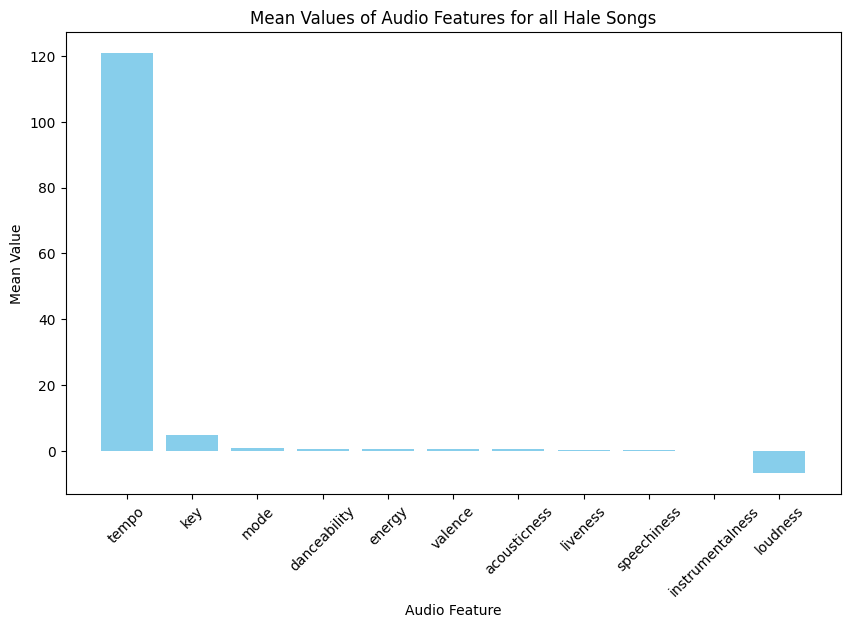

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_df['audio_feature'], mean_df['mean'], color='skyblue')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.title('Mean Values of Audio Features for all Hale Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [ ]:
# Calculate the 80th percentile of the 'popularity' column in track_data_trc
quantile_value = np.percentile(df['popularity'], 90)

# Filter rows where 'popularity' is greater than or equal to the quantile value
popular = df[df['popularity'] >= quantile_value]

popular

track_id                                      track_name  \
29  2Zg0aB5oVQlbQE1vzQmIIY                                   Hurt Somebody   
25  77MdvMx9L4ZQuLhhn3o21h  If the World Was Ending (feat. Julia Michaels)   
18  7vu0JkJh0ldukEYbTVcqd0                                          Issues   
26  5WtfUKzXircvW8l5aaVZWT                 What A Time (feat. Niall Horan)   

                 artist_id     artist_name                album_id  duration  \
29  2RQXRUsr4IW1f3mKyKsy4B      Noah Kahan  3DNQrMjvVGiueVrj1qquJd    167106   
25  66W9LaWS0DPdL7Sz8iYGYe         JP Saxe  538BxdI7oOQykSkEtyjhUD    209493   
18  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  1qyjZGIeeLJlXbYWuoloWj    176320   
26  0ZED1XzwlLHW4ZaG4lOT6m  Julia Michaels  1xJ7jIK1tT0aVoJw1fPE6r    173306   

   release_date  popularity  danceability  energy  key  loudness  mode  \
29   2019-06-14          73         0.638   0.510    1    -6.485     1   
25   2021-06-25          77         0.429   0.486    1    -9.971     1   
18   2017-07-28          79         0.728   0.415    8    -6.852     1   
26   2019-01-24          81         0.516   0.467    0    -6.184     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
29       0.3050         0.344               0.0    0.2120    0.448  114.576   
25       0.1010         0.866               0.0    0.0982    0.661  146.990   
18       0.0639         0.401               0.0    0.0616    0.455  114.145   
26       0.0302         0.662               0.0    0.0853    0.386  132.861   

        album_name  
29         Singles  
25         Singles  
18  Nervous System  
26         Singles

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'album_name'],
      dtype='object')


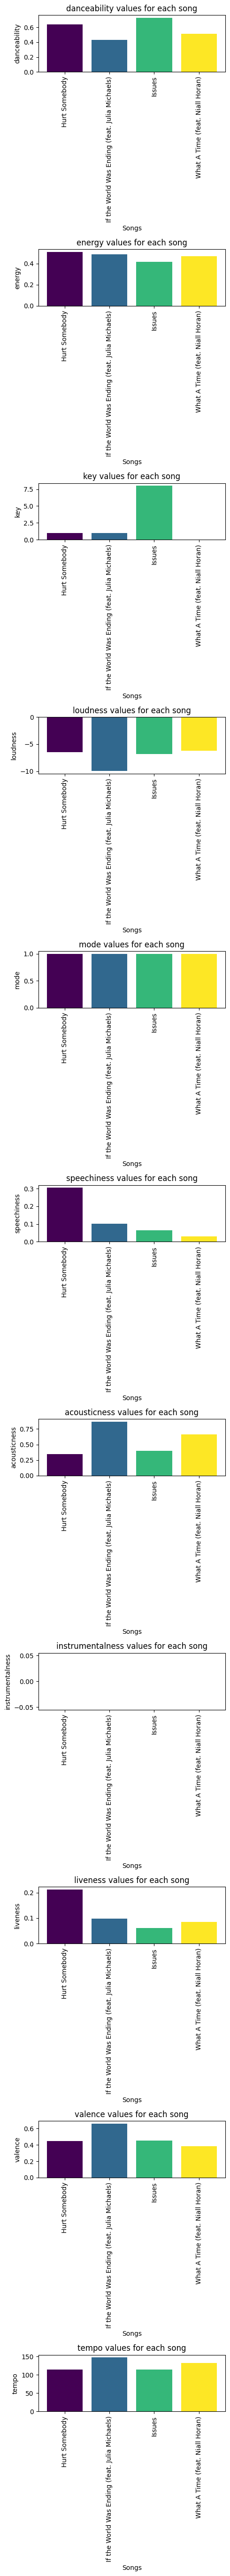

In [ ]:
# Define the list of audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Reset the index to use integer indices
popular = popular.reset_index()

# Extract the song titles for labeling
song_titles = popular['track_name']

# Set the number of rows and columns for subplots
num_rows = len(audio_features)
num_cols = 1

# Create a color map with a unique color for each song
n_songs = len(popular)
colors = plt.cm.viridis(np.linspace(0, 1, n_songs))  # You can use any colormap you prefer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

# Iterate through each audio feature and create a separate plot
for i, feature in enumerate(audio_features):
    ax = axes[i]  # Get the current axis
    for song_idx in range(n_songs):
        # Use label for the legend
        ax.bar(song_idx, popular[feature][song_idx], color=colors[song_idx], label=song_titles[song_idx])
    ax.set_xlabel('Songs')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} values for each song')
    ax.set_xticks(np.arange(n_songs))
    ax.set_xticklabels(song_titles, rotation=90)  # Use song titles as x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()